In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
workpath = '/content/drive/MyDrive/MaestriaIA/Tesis'
datasetpath = workpath + "/dataset_eggs"

**Extracción de imágenes en vídeo**

In [ ]:
import os
path_image = datasetpath + "/dataset_eggs_3"
if not os.path.exists(path_image):
    os.makedirs(path_image)
    print(f"Carpeta creada: {path_image}")
else:
    print(f"La carpeta ya existe: {path_image}")
# **1. EXTRACCIÓN DE IMAGEN EN VÍDEO**
!ffmpeg -i "{workpath}/source_video/video_huevos_3.mp4" -start_number 1057 -vf "fps=1" "{workpath}/dataset/dataset_eggs_3/eggs_%04d.jpg"

La carpeta ya existe: /content/drive/MyDrive/MaestriaIA/Tesis/dataset/dataset_eggs_3
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libthe

In [ ]:
import shutil

# Definir la ruta de la carpeta donde están las imágenes
dataset_path = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset/dataset_eggs_3"
zip_path = "/content/dataset_eggs_3.zip"

# Comprimir la carpeta en un archivo ZIP
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', dataset_path)

print(f"Archivo comprimido en: {zip_path}")


Archivo comprimido en: /content/dataset_eggs_3.zip


**Lectura de imágenes en las carpetas**

# **GROUNDED DINO + SAM2**

In [ ]:
!rm -rf /content/Grounded-SAM-2

In [ ]:
!mkdir /content/Grounded-SAM2
%cd /content/Grounded-SAM2
!git clone https://github.com/facebookresearch/segment-anything-2.git

/content/Grounded-SAM2
Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 134.70 MiB | 15.36 MiB/s, done.
Resolving deltas: 100% (376/376), done.


In [ ]:
%cd /content/Grounded-SAM2/segment-anything-2
!python setup.py install

/content/Grounded-SAM2/segment-anything-2
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
       

In [ ]:
%cd /content/Grounded-SAM2/segment-anything-2/checkpoints
!./download_ckpts.sh

/content/Grounded-SAM2/segment-anything-2/checkpoints
--2025-02-01 21:50:07--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.124, 108.157.254.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   339MB/s    in 0.4s    

2025-02-01 21:50:08 (339 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2025-02-01 21:50:08--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.124, 108.157.254.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connected.
HTT

In [ ]:
%cd /content/
!git clone https://github.com/IDEA-Research/GroundingDINO.git

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 463 (delta 176), reused 137 (delta 137), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 11.62 MiB/s, done.
Resolving deltas: 100% (241/241), done.


In [ ]:
%cd /content/GroundingDINO/
!pip install -r requirements.txt

/content/GroundingDINO
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_curand_cu12-10.3.5.147-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cuda_runtime_cu12-12.4.127-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/iopath-0.1.10-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-pack

In [ ]:
!pip install -e .

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_curand_cu12-10.3.5.147-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cuda_runtime_cu12-12.4.127-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/iopath-0.1.10-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cufft_cu12-

In [ ]:
import groundingdino
print("GroundingDINO importado con éxito.")

GroundingDINO importado con éxito.


In [ ]:
!mkdir checkpoints
%cd checkpoints
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content/GroundingDINO/checkpoints


In [ ]:
!pip install hydra-core --force-reinstall

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_curand_cu12-10.3.5.147-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cuda_runtime_cu12-12.4.127-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/iopath-0.1.10-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/nvidia_cufft_cu12-

#Extraer todas las imagenes huevo

**Generaremos etiquetas**

In [ ]:
import os
import cv2
import torch
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from torchvision.ops import box_convert
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
from GroundingDINO.groundingdino.util.inference import load_model, load_image, predict
from sklearn.ensemble import IsolationForest

# 🔹 Configuración de parámetros
TEXT_PROMPT = "egg"
DATASET_DIR = Path("/content/drive/MyDrive/MaestriaIA/Tesis/dataset_eggs")
SAM2_CHECKPOINT = "/content/Grounded-SAM2/segment-anything-2/checkpoints/sam2.1_hiera_large.pt"
SAM2_MODEL_CONFIG = "configs/sam2.1/sam2.1_hiera_l.yaml"
GROUNDING_DINO_CONFIG = "/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
GROUNDING_DINO_CHECKPOINT = "/content/GroundingDINO/checkpoints/groundingdino_swint_ogc.pth"
BOX_THRESHOLD = 0.1
TEXT_THRESHOLD = 0.05
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Directorios de salida
BASE_OUTPUT_DIR = Path("/content/dataset_huevos/")
IMAGES_DIR = BASE_OUTPUT_DIR / "images"
LABELS_DIR = BASE_OUTPUT_DIR / "labels"
STATS_DIR = BASE_OUTPUT_DIR / "stats"
IMAGES_DIR.mkdir(parents=True, exist_ok=True)
LABELS_DIR.mkdir(parents=True, exist_ok=True)
STATS_DIR.mkdir(parents=True, exist_ok=True)

# 🔹 Cargar modelos
sam2_model = build_sam2(SAM2_MODEL_CONFIG, SAM2_CHECKPOINT, device=DEVICE)
sam2_predictor = SAM2ImagePredictor(sam2_model)
grounding_model = load_model(GROUNDING_DINO_CONFIG, GROUNDING_DINO_CHECKPOINT)
grounding_model.to(DEVICE)  # Evita advertencias moviendo el modelo manualmente

# 🔹 Recorrer todas las imágenes en el dataset
image_files = list(DATASET_DIR.glob("*.jpg"))
stats_data = []

for IMG_PATH in image_files:
    print(f"📌 Procesando imagen: {IMG_PATH.name}")
    start_time = time.time()

    # 🔹 Cargar imagen
    img = cv2.imread(str(IMG_PATH))
    if img is None:
        print(f"⚠️ Advertencia: No se pudo cargar {IMG_PATH}, omitiendo...")
        continue

    h, w, _ = img.shape

    # 🔹 Detección con GroundingDINO
    image_source, image = load_image(str(IMG_PATH))
    sam2_predictor.set_image(image_source)
    boxes, confidences, labels = predict(grounding_model, image, TEXT_PROMPT, BOX_THRESHOLD, TEXT_THRESHOLD)

    # 🔹 Escalar bounding boxes asegurando que estén en el mismo dispositivo
    boxes = boxes.to(DEVICE) * torch.tensor([w, h, w, h], device=DEVICE)
    input_boxes = box_convert(boxes, in_fmt="cxcywh", out_fmt="xyxy").cpu().numpy()

    # 🔹 Aplicar Isolation Forest para eliminar anomalías en detecciones
    if len(input_boxes) > 1:
        clf = IsolationForest(contamination=0.1, random_state=42)
        anomalies = clf.fit_predict(input_boxes)
        valid_boxes = input_boxes[anomalies == 1]
    else:
        valid_boxes = input_boxes

    num_detected_eggs = len(input_boxes)
    num_segmented_eggs = len(valid_boxes)
    sizes = [((box[2] - box[0]), (box[3] - box[1])) for box in valid_boxes]

    # 🔹 Segmentación con SAM2 y generación de etiquetas YOLO
    labels_txt = []
    for box in valid_boxes:
        x1, y1, x2, y2 = map(int, box)

        center_x, center_y = (x1 + x2) // 2, (y1 + y2) // 2
        point_coords = torch.tensor([[center_x, center_y]], dtype=torch.float32, device=DEVICE)

        masks, _, _ = sam2_predictor.predict(
            point_coords=point_coords,
            point_labels=torch.tensor([1], dtype=torch.int, device=DEVICE),
            multimask_output=False
        )

        if masks is None or len(masks) == 0:
            continue

        # 🔹 Obtener contornos de la máscara segmentada
        mask_np = masks[0].astype(np.uint8)
        contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if len(contours) == 0:
            continue

        # 🔹 Convertir contorno a formato YOLO (normalizado)
        largest_contour = max(contours, key=cv2.contourArea)
        yolo_contour = [(x[0][0] / w, x[0][1] / h) for x in largest_contour]
        label_line = "0 " + " ".join([f"{x:.6f} {y:.6f}" for x, y in yolo_contour])
        labels_txt.append(label_line)

    # 🔹 Guardar etiquetas YOLO
    image_name = IMG_PATH.stem
    label_path = LABELS_DIR / f"{image_name}.txt"
    with open(label_path, "w") as f:
        for line in labels_txt:
            f.write(line + "\n")

    # 🔹 Guardar imagen sin contornos en imágenes procesadas
    segmented_img_path = IMAGES_DIR / f"{image_name}.jpg"
    cv2.imwrite(str(segmented_img_path), img)

    # 🔹 Guardar datos estadísticos
    end_time = time.time()
    processing_time = end_time - start_time
    avg_width, avg_height = np.mean(sizes, axis=0) if sizes else (0, 0)
    segmentation_diff = num_detected_eggs - num_segmented_eggs

    stats_data.append([
        IMG_PATH.name,
        num_detected_eggs,
        num_segmented_eggs,
        avg_width,
        avg_height,
        processing_time,
        segmentation_diff
    ])

# 🔹 Crear DataFrame con estadísticas
df_stats = pd.DataFrame(stats_data, columns=[
    "Imagen",
    "Huevos Detectados",
    "Huevos Segmentados",
    "Ancho Promedio",
    "Alto Promedio",
    "Tiempo de Procesamiento",
    "Diferencia Detección-Segmentación"
])

# 🔹 Guardar CSV con estadísticas
df_stats.to_csv(STATS_DIR / "estadisticas_huevos.csv", index=False)

print("🎉 Procesamiento finalizado. Datos estadísticos, etiquetas YOLO y gráficos generados.")


final text_encoder_type: bert-base-uncased


📌 Procesando imagen: eggs_1116.jpg


📌 Procesando imagen: eggs_1119.jpg


📌 Procesando imagen: eggs_1118.jpg


📌 Procesando imagen: eggs_1117.jpg


📌 Procesando imagen: eggs_1120.jpg


📌 Procesando imagen: eggs_1121.jpg


📌 Procesando imagen: eggs_1122.jpg


📌 Procesando imagen: eggs_1125.jpg


📌 Procesando imagen: eggs_1123.jpg


📌 Procesando imagen: eggs_1124.jpg


📌 Procesando imagen: eggs_1126.jpg


📌 Procesando imagen: eggs_1127.jpg


📌 Procesando imagen: eggs_1128.jpg


📌 Procesando imagen: eggs_1129.jpg


📌 Procesando imagen: eggs_1131.jpg


📌 Procesando imagen: eggs_1132.jpg


📌 Procesando imagen: eggs_1130.jpg


📌 Procesando imagen: eggs_1135.jpg


📌 Procesando imagen: eggs_1134.jpg


📌 Procesando imagen: eggs_1133.jpg


📌 Procesando imagen: eggs_1136.jpg


📌 Procesando imagen: eggs_1137.jpg


📌 Procesando imagen: eggs_1138.jpg


📌 Procesando imagen: eggs_1141.jpg


📌 Procesando imagen: eggs_1139.jpg


📌 Procesando imagen: eggs_1140.jpg


📌 Procesando imagen: eggs_1142.jpg


📌 Procesando imagen: eggs_1143.jpg


📌 Procesando imagen: eggs_1144.jpg


📌 Procesando imagen: eggs_1146.jpg


📌 Procesando imagen: eggs_1145.jpg


📌 Procesando imagen: eggs_1147.jpg


📌 Procesando imagen: eggs_1149.jpg


📌 Procesando imagen: eggs_1148.jpg


📌 Procesando imagen: eggs_1151.jpg


📌 Procesando imagen: eggs_1150.jpg


📌 Procesando imagen: eggs_1152.jpg


📌 Procesando imagen: eggs_1154.jpg


📌 Procesando imagen: eggs_1153.jpg


📌 Procesando imagen: eggs_1155.jpg


📌 Procesando imagen: eggs_1157.jpg


📌 Procesando imagen: eggs_1156.jpg


📌 Procesando imagen: eggs_1159.jpg


📌 Procesando imagen: eggs_1158.jpg


📌 Procesando imagen: eggs_1160.jpg


📌 Procesando imagen: eggs_1162.jpg


📌 Procesando imagen: eggs_1161.jpg


📌 Procesando imagen: eggs_1163.jpg


📌 Procesando imagen: eggs_1166.jpg


📌 Procesando imagen: eggs_1164.jpg


📌 Procesando imagen: eggs_1165.jpg


📌 Procesando imagen: eggs_1167.jpg


📌 Procesando imagen: eggs_1169.jpg


📌 Procesando imagen: eggs_1168.jpg


📌 Procesando imagen: eggs_1170.jpg


📌 Procesando imagen: eggs_1172.jpg


📌 Procesando imagen: eggs_1173.jpg


📌 Procesando imagen: eggs_1171.jpg


📌 Procesando imagen: eggs_1175.jpg


📌 Procesando imagen: eggs_1174.jpg


📌 Procesando imagen: eggs_1176.jpg


📌 Procesando imagen: eggs_1178.jpg


📌 Procesando imagen: eggs_1177.jpg


📌 Procesando imagen: eggs_1180.jpg


📌 Procesando imagen: eggs_1181.jpg


📌 Procesando imagen: eggs_1179.jpg


📌 Procesando imagen: eggs_1182.jpg


📌 Procesando imagen: eggs_1184.jpg


📌 Procesando imagen: eggs_1183.jpg


📌 Procesando imagen: eggs_1186.jpg


📌 Procesando imagen: eggs_1185.jpg


📌 Procesando imagen: eggs_1187.jpg


📌 Procesando imagen: eggs_1188.jpg


📌 Procesando imagen: eggs_1191.jpg


📌 Procesando imagen: eggs_1190.jpg


📌 Procesando imagen: eggs_1189.jpg


📌 Procesando imagen: eggs_1192.jpg


📌 Procesando imagen: eggs_1193.jpg


📌 Procesando imagen: eggs_1194.jpg


📌 Procesando imagen: eggs_1196.jpg


📌 Procesando imagen: eggs_1195.jpg


📌 Procesando imagen: eggs_1197.jpg


📌 Procesando imagen: eggs_1200.jpg


📌 Procesando imagen: eggs_1201.jpg


📌 Procesando imagen: eggs_1198.jpg


📌 Procesando imagen: eggs_1199.jpg


📌 Procesando imagen: eggs_1202.jpg


📌 Procesando imagen: eggs_1203.jpg


📌 Procesando imagen: eggs_1204.jpg


📌 Procesando imagen: eggs_1205.jpg


📌 Procesando imagen: eggs_1206.jpg


📌 Procesando imagen: eggs_1207.jpg


📌 Procesando imagen: eggs_1208.jpg


📌 Procesando imagen: eggs_1211.jpg


📌 Procesando imagen: eggs_1209.jpg


📌 Procesando imagen: eggs_1210.jpg


📌 Procesando imagen: eggs_1213.jpg


📌 Procesando imagen: eggs_1212.jpg


📌 Procesando imagen: eggs_1214.jpg


📌 Procesando imagen: eggs_1217.jpg


📌 Procesando imagen: eggs_1215.jpg


📌 Procesando imagen: eggs_1216.jpg


📌 Procesando imagen: eggs_1218.jpg


📌 Procesando imagen: eggs_1219.jpg


📌 Procesando imagen: eggs_1220.jpg


📌 Procesando imagen: eggs_1222.jpg


📌 Procesando imagen: eggs_1223.jpg


📌 Procesando imagen: eggs_1221.jpg


📌 Procesando imagen: eggs_1224.jpg


📌 Procesando imagen: eggs_1225.jpg


📌 Procesando imagen: eggs_1227.jpg


📌 Procesando imagen: eggs_1226.jpg


📌 Procesando imagen: eggs_1228 (1).jpg


📌 Procesando imagen: eggs_1229 (1).jpg


📌 Procesando imagen: eggs_1230.jpg


📌 Procesando imagen: eggs_1229.jpg


📌 Procesando imagen: eggs_1228.jpg


📌 Procesando imagen: eggs_1232.jpg


📌 Procesando imagen: eggs_1231.jpg


📌 Procesando imagen: eggs_1233.jpg


📌 Procesando imagen: eggs_1236.jpg


📌 Procesando imagen: eggs_1235.jpg


📌 Procesando imagen: eggs_1234.jpg


📌 Procesando imagen: eggs_1237.jpg


📌 Procesando imagen: eggs_1238.jpg


📌 Procesando imagen: eggs_1241.jpg


📌 Procesando imagen: eggs_1239.jpg


📌 Procesando imagen: eggs_1240.jpg


📌 Procesando imagen: eggs_1242.jpg


📌 Procesando imagen: eggs_1243.jpg


📌 Procesando imagen: eggs_1244.jpg


📌 Procesando imagen: eggs_1245.jpg


📌 Procesando imagen: eggs_1246.jpg


📌 Procesando imagen: eggs_1247.jpg


📌 Procesando imagen: eggs_1248.jpg


📌 Procesando imagen: eggs_1250.jpg


📌 Procesando imagen: eggs_1251.jpg


📌 Procesando imagen: eggs_1249.jpg


📌 Procesando imagen: eggs_1253.jpg


📌 Procesando imagen: eggs_1254.jpg


📌 Procesando imagen: eggs_1252.jpg


📌 Procesando imagen: eggs_1257.jpg


📌 Procesando imagen: eggs_1256.jpg


📌 Procesando imagen: eggs_1255.jpg


📌 Procesando imagen: eggs_1259.jpg


📌 Procesando imagen: eggs_1260.jpg


📌 Procesando imagen: eggs_1258.jpg


📌 Procesando imagen: eggs_1261.jpg


📌 Procesando imagen: eggs_1262.jpg


📌 Procesando imagen: eggs_1264.jpg


📌 Procesando imagen: eggs_1263.jpg


📌 Procesando imagen: eggs_1266.jpg


📌 Procesando imagen: eggs_1267.jpg


📌 Procesando imagen: eggs_1265.jpg


📌 Procesando imagen: eggs_1268.jpg


📌 Procesando imagen: eggs_1270.jpg


📌 Procesando imagen: eggs_1269.jpg


📌 Procesando imagen: eggs_1271.jpg


📌 Procesando imagen: eggs_1272.jpg


📌 Procesando imagen: eggs_1273.jpg


📌 Procesando imagen: eggs_1274.jpg


📌 Procesando imagen: eggs_1275.jpg


📌 Procesando imagen: eggs_1277.jpg


📌 Procesando imagen: eggs_1276.jpg


📌 Procesando imagen: eggs_1278.jpg


📌 Procesando imagen: eggs_1280.jpg


📌 Procesando imagen: eggs_1279.jpg


📌 Procesando imagen: eggs_1281.jpg


📌 Procesando imagen: eggs_1282.jpg


📌 Procesando imagen: eggs_1284.jpg


📌 Procesando imagen: eggs_1283.jpg


📌 Procesando imagen: eggs_1286.jpg


📌 Procesando imagen: eggs_1285.jpg


📌 Procesando imagen: eggs_1289.jpg


📌 Procesando imagen: eggs_1288.jpg


📌 Procesando imagen: eggs_1290.jpg


📌 Procesando imagen: eggs_1287.jpg


📌 Procesando imagen: eggs_1294.jpg


📌 Procesando imagen: eggs_1292.jpg


📌 Procesando imagen: eggs_1291.jpg


📌 Procesando imagen: eggs_1293.jpg


📌 Procesando imagen: eggs_1296.jpg


📌 Procesando imagen: eggs_1298.jpg


📌 Procesando imagen: eggs_1295.jpg


📌 Procesando imagen: eggs_1299.jpg


📌 Procesando imagen: eggs_1297.jpg


📌 Procesando imagen: eggs_1300.jpg


📌 Procesando imagen: eggs_1301.jpg


📌 Procesando imagen: eggs_1303.jpg


📌 Procesando imagen: eggs_1304.jpg


📌 Procesando imagen: eggs_1302.jpg


📌 Procesando imagen: eggs_1305.jpg


📌 Procesando imagen: eggs_1307.jpg


📌 Procesando imagen: eggs_1306.jpg


📌 Procesando imagen: eggs_1312.jpg


📌 Procesando imagen: eggs_1309.jpg


📌 Procesando imagen: eggs_1311.jpg


📌 Procesando imagen: eggs_1308.jpg


📌 Procesando imagen: eggs_1310.jpg


📌 Procesando imagen: eggs_1315.jpg


📌 Procesando imagen: eggs_1316.jpg


📌 Procesando imagen: eggs_1314.jpg


📌 Procesando imagen: eggs_1313.jpg


📌 Procesando imagen: eggs_1317.jpg


📌 Procesando imagen: eggs_1322.jpg


📌 Procesando imagen: eggs_1318.jpg


📌 Procesando imagen: eggs_1320.jpg


📌 Procesando imagen: eggs_1321.jpg


📌 Procesando imagen: eggs_1319.jpg


📌 Procesando imagen: eggs_1324.jpg


📌 Procesando imagen: eggs_1325.jpg


📌 Procesando imagen: eggs_1327.jpg


📌 Procesando imagen: eggs_1323.jpg


📌 Procesando imagen: eggs_1326.jpg


📌 Procesando imagen: eggs_1328.jpg


📌 Procesando imagen: eggs_1329.jpg


📌 Procesando imagen: eggs_1332.jpg


📌 Procesando imagen: eggs_1331.jpg


📌 Procesando imagen: eggs_1330.jpg


📌 Procesando imagen: eggs_1333.jpg


📌 Procesando imagen: eggs_1334.jpg


📌 Procesando imagen: eggs_1335.jpg


📌 Procesando imagen: eggs_1338.jpg


📌 Procesando imagen: eggs_1337.jpg


📌 Procesando imagen: eggs_1336.jpg


📌 Procesando imagen: eggs_1341.jpg


📌 Procesando imagen: eggs_1340.jpg


📌 Procesando imagen: eggs_1339.jpg


📌 Procesando imagen: eggs_1342.jpg


📌 Procesando imagen: eggs_1344.jpg


📌 Procesando imagen: eggs_1343.jpg


📌 Procesando imagen: eggs_1345.jpg


📌 Procesando imagen: eggs_1347.jpg


📌 Procesando imagen: eggs_1346.jpg


📌 Procesando imagen: eggs_1349.jpg


📌 Procesando imagen: eggs_1348.jpg


📌 Procesando imagen: eggs_1351.jpg


📌 Procesando imagen: eggs_1352.jpg


📌 Procesando imagen: eggs_1350.jpg


📌 Procesando imagen: eggs_1357.jpg


📌 Procesando imagen: eggs_1354.jpg


📌 Procesando imagen: eggs_1353.jpg


📌 Procesando imagen: eggs_1356.jpg


📌 Procesando imagen: eggs_1355.jpg


📌 Procesando imagen: eggs_1358.jpg


📌 Procesando imagen: eggs_1361.jpg


📌 Procesando imagen: eggs_1362.jpg


📌 Procesando imagen: eggs_1359.jpg


📌 Procesando imagen: eggs_1360.jpg


📌 Procesando imagen: eggs_1366.jpg


📌 Procesando imagen: eggs_1364.jpg


📌 Procesando imagen: eggs_1367.jpg


📌 Procesando imagen: eggs_1365.jpg


📌 Procesando imagen: eggs_1363.jpg


📌 Procesando imagen: eggs_1370.jpg


📌 Procesando imagen: eggs_1369.jpg


📌 Procesando imagen: eggs_1368.jpg


📌 Procesando imagen: eggs_1373.jpg


📌 Procesando imagen: eggs_1372.jpg


📌 Procesando imagen: eggs_1371.jpg


📌 Procesando imagen: eggs_1377.jpg


📌 Procesando imagen: eggs_1376.jpg


📌 Procesando imagen: eggs_1374.jpg


📌 Procesando imagen: eggs_1375.jpg


📌 Procesando imagen: eggs_1378.jpg


📌 Procesando imagen: eggs_1381.jpg


📌 Procesando imagen: eggs_1382.jpg


📌 Procesando imagen: eggs_1383.jpg


📌 Procesando imagen: eggs_1380.jpg


📌 Procesando imagen: eggs_1379.jpg


📌 Procesando imagen: eggs_1384.jpg


📌 Procesando imagen: eggs_1386.jpg


📌 Procesando imagen: eggs_1385.jpg


📌 Procesando imagen: eggs_1388.jpg


📌 Procesando imagen: eggs_1387.jpg


📌 Procesando imagen: eggs_1390.jpg


📌 Procesando imagen: eggs_1392.jpg


📌 Procesando imagen: eggs_1389.jpg


📌 Procesando imagen: eggs_1391.jpg


📌 Procesando imagen: eggs_1394.jpg


📌 Procesando imagen: eggs_1393.jpg


📌 Procesando imagen: eggs_1395.jpg


📌 Procesando imagen: eggs_1396.jpg


📌 Procesando imagen: eggs_1397.jpg


📌 Procesando imagen: eggs_1401.jpg


📌 Procesando imagen: eggs_1399.jpg


📌 Procesando imagen: eggs_1398.jpg


📌 Procesando imagen: eggs_1400.jpg


📌 Procesando imagen: eggs_1403.jpg


📌 Procesando imagen: eggs_1404.jpg


📌 Procesando imagen: eggs_1402.jpg


📌 Procesando imagen: eggs_1407.jpg


📌 Procesando imagen: eggs_1406.jpg


📌 Procesando imagen: eggs_1405.jpg


📌 Procesando imagen: eggs_1409.jpg


📌 Procesando imagen: eggs_1408.jpg


📌 Procesando imagen: eggs_1412.jpg


📌 Procesando imagen: eggs_1410.jpg


📌 Procesando imagen: eggs_1411.jpg


📌 Procesando imagen: eggs_1413.jpg


📌 Procesando imagen: eggs_1417.jpg


📌 Procesando imagen: eggs_1418.jpg


📌 Procesando imagen: eggs_1414.jpg


📌 Procesando imagen: eggs_1416.jpg


📌 Procesando imagen: eggs_1415.jpg


📌 Procesando imagen: eggs_1422.jpg


📌 Procesando imagen: eggs_1421.jpg


📌 Procesando imagen: eggs_1419.jpg


📌 Procesando imagen: eggs_1423.jpg


📌 Procesando imagen: eggs_1420.jpg


📌 Procesando imagen: eggs_1426.jpg


📌 Procesando imagen: eggs_1424.jpg


📌 Procesando imagen: eggs_1427.jpg


📌 Procesando imagen: eggs_1428.jpg


📌 Procesando imagen: eggs_1425.jpg


📌 Procesando imagen: eggs_1429.jpg


📌 Procesando imagen: eggs_1431.jpg


📌 Procesando imagen: eggs_1432.jpg


📌 Procesando imagen: eggs_1430.jpg


📌 Procesando imagen: eggs_1433.jpg


📌 Procesando imagen: eggs_1435.jpg


📌 Procesando imagen: eggs_1434.jpg


📌 Procesando imagen: eggs_1436.jpg


📌 Procesando imagen: eggs_1437.jpg


📌 Procesando imagen: eggs_1438.jpg


📌 Procesando imagen: eggs_1439.jpg


📌 Procesando imagen: eggs_1443.jpg


📌 Procesando imagen: eggs_1442.jpg


📌 Procesando imagen: eggs_1440.jpg


📌 Procesando imagen: eggs_1441.jpg


📌 Procesando imagen: eggs_1444.jpg


📌 Procesando imagen: eggs_1445.jpg


📌 Procesando imagen: eggs_1446.jpg


📌 Procesando imagen: eggs_1448.jpg


📌 Procesando imagen: eggs_1447.jpg


📌 Procesando imagen: eggs_1449.jpg


📌 Procesando imagen: eggs_1451.jpg


📌 Procesando imagen: eggs_1450.jpg


📌 Procesando imagen: eggs_1453.jpg


📌 Procesando imagen: eggs_1452.jpg


📌 Procesando imagen: eggs_1454.jpg


📌 Procesando imagen: eggs_1455.jpg


📌 Procesando imagen: eggs_1457.jpg


📌 Procesando imagen: eggs_1458.jpg


📌 Procesando imagen: eggs_1459.jpg


📌 Procesando imagen: eggs_1456.jpg


📌 Procesando imagen: eggs_1463.jpg


📌 Procesando imagen: eggs_1461.jpg


📌 Procesando imagen: eggs_1462.jpg


📌 Procesando imagen: eggs_1460.jpg


📌 Procesando imagen: eggs_1464.jpg


📌 Procesando imagen: eggs_1468.jpg


📌 Procesando imagen: eggs_1467.jpg


📌 Procesando imagen: eggs_1465.jpg


📌 Procesando imagen: eggs_1466.jpg


📌 Procesando imagen: eggs_1469.jpg


📌 Procesando imagen: eggs_1471.jpg


📌 Procesando imagen: eggs_1470.jpg


📌 Procesando imagen: eggs_1473.jpg


📌 Procesando imagen: eggs_1474.jpg


📌 Procesando imagen: eggs_1472.jpg


📌 Procesando imagen: eggs_1475.jpg


📌 Procesando imagen: eggs_1476.jpg


📌 Procesando imagen: eggs_1478.jpg


📌 Procesando imagen: eggs_1477.jpg


📌 Procesando imagen: eggs_1479.jpg


📌 Procesando imagen: eggs_1481.jpg


📌 Procesando imagen: eggs_1483.jpg


📌 Procesando imagen: eggs_1484.jpg


📌 Procesando imagen: eggs_1480.jpg


📌 Procesando imagen: eggs_1482.jpg


📌 Procesando imagen: eggs_1485.jpg


📌 Procesando imagen: eggs_1489.jpg


📌 Procesando imagen: eggs_1487.jpg


📌 Procesando imagen: eggs_1488.jpg


📌 Procesando imagen: eggs_1486.jpg


📌 Procesando imagen: eggs_1493.jpg


📌 Procesando imagen: eggs_1492.jpg


📌 Procesando imagen: eggs_1491.jpg


📌 Procesando imagen: eggs_1494.jpg


📌 Procesando imagen: eggs_1490.jpg


📌 Procesando imagen: eggs_1496.jpg


📌 Procesando imagen: eggs_1497.jpg


📌 Procesando imagen: eggs_1499.jpg


📌 Procesando imagen: eggs_1495.jpg


📌 Procesando imagen: eggs_1498.jpg


📌 Procesando imagen: eggs_1503.jpg


📌 Procesando imagen: eggs_1501.jpg


📌 Procesando imagen: eggs_1500.jpg


📌 Procesando imagen: eggs_1502.jpg


📌 Procesando imagen: eggs_1506.jpg


📌 Procesando imagen: eggs_1505.jpg


📌 Procesando imagen: eggs_1504.jpg


📌 Procesando imagen: eggs_1509.jpg


📌 Procesando imagen: eggs_1508.jpg


📌 Procesando imagen: eggs_1507.jpg


📌 Procesando imagen: eggs_1514.jpg


📌 Procesando imagen: eggs_1510.jpg


📌 Procesando imagen: eggs_1513.jpg


📌 Procesando imagen: eggs_1512.jpg


📌 Procesando imagen: eggs_1511.jpg


📌 Procesando imagen: eggs_1517.jpg


📌 Procesando imagen: eggs_1516.jpg


📌 Procesando imagen: eggs_1518.jpg


📌 Procesando imagen: eggs_1519.jpg


📌 Procesando imagen: eggs_1515.jpg


📌 Procesando imagen: eggs_1524.jpg


📌 Procesando imagen: eggs_1523.jpg


📌 Procesando imagen: eggs_1525.jpg


📌 Procesando imagen: eggs_1522.jpg


📌 Procesando imagen: eggs_1520.jpg


📌 Procesando imagen: eggs_1521.jpg


📌 Procesando imagen: eggs_1529.jpg


📌 Procesando imagen: eggs_1528.jpg


📌 Procesando imagen: eggs_1526.jpg


📌 Procesando imagen: eggs_1527.jpg


📌 Procesando imagen: eggs_1530.jpg


📌 Procesando imagen: eggs_1532.jpg


📌 Procesando imagen: eggs_1533.jpg


📌 Procesando imagen: eggs_1531.jpg


📌 Procesando imagen: eggs_1534.jpg


📌 Procesando imagen: eggs_1537.jpg


📌 Procesando imagen: eggs_1535.jpg


📌 Procesando imagen: eggs_1536.jpg


📌 Procesando imagen: eggs_1539.jpg


📌 Procesando imagen: eggs_1541.jpg


📌 Procesando imagen: eggs_1540.jpg


📌 Procesando imagen: eggs_1538.jpg


📌 Procesando imagen: eggs_1545.jpg


📌 Procesando imagen: eggs_1543.jpg


📌 Procesando imagen: eggs_1544.jpg


📌 Procesando imagen: eggs_1542.jpg


📌 Procesando imagen: eggs_1547.jpg


📌 Procesando imagen: eggs_1546.jpg


📌 Procesando imagen: eggs_1550.jpg


📌 Procesando imagen: eggs_1548.jpg


📌 Procesando imagen: eggs_1549.jpg


📌 Procesando imagen: eggs_1553.jpg


📌 Procesando imagen: eggs_1551.jpg


📌 Procesando imagen: eggs_1555.jpg


📌 Procesando imagen: eggs_1554.jpg


📌 Procesando imagen: eggs_1552.jpg


📌 Procesando imagen: eggs_1557.jpg


📌 Procesando imagen: eggs_1558.jpg


📌 Procesando imagen: eggs_1556.jpg


📌 Procesando imagen: eggs_1559.jpg


📌 Procesando imagen: eggs_1560.jpg


📌 Procesando imagen: eggs_1561.jpg


📌 Procesando imagen: eggs_1565.jpg


📌 Procesando imagen: eggs_1563.jpg


📌 Procesando imagen: eggs_1562.jpg


📌 Procesando imagen: eggs_1564.jpg


📌 Procesando imagen: eggs_1568.jpg


📌 Procesando imagen: eggs_1566.jpg


📌 Procesando imagen: eggs_1569.jpg


📌 Procesando imagen: eggs_1567.jpg


📌 Procesando imagen: eggs_1571.jpg


📌 Procesando imagen: eggs_1570.jpg


📌 Procesando imagen: eggs_1572.jpg


📌 Procesando imagen: eggs_1573.jpg


📌 Procesando imagen: eggs_1575.jpg


📌 Procesando imagen: eggs_1574.jpg


📌 Procesando imagen: eggs_1577.jpg


📌 Procesando imagen: eggs_1578.jpg


📌 Procesando imagen: eggs_1579.jpg


📌 Procesando imagen: eggs_1580.jpg


📌 Procesando imagen: eggs_1576.jpg


📌 Procesando imagen: eggs_1582.jpg


📌 Procesando imagen: eggs_1581.jpg


📌 Procesando imagen: eggs_1585.jpg


📌 Procesando imagen: eggs_1584.jpg


📌 Procesando imagen: eggs_1583.jpg


📌 Procesando imagen: eggs_1591.jpg


📌 Procesando imagen: eggs_1590.jpg


📌 Procesando imagen: eggs_1586.jpg


📌 Procesando imagen: eggs_1587.jpg


📌 Procesando imagen: eggs_1588.jpg


📌 Procesando imagen: eggs_1589.jpg


📌 Procesando imagen: eggs_1592.jpg


📌 Procesando imagen: eggs_1596.jpg


📌 Procesando imagen: eggs_1593.jpg


📌 Procesando imagen: eggs_1594.jpg


📌 Procesando imagen: eggs_1595.jpg


📌 Procesando imagen: eggs_1599.jpg


📌 Procesando imagen: eggs_1598.jpg


📌 Procesando imagen: eggs_1600.jpg


📌 Procesando imagen: eggs_1597.jpg


📌 Procesando imagen: eggs_1601.jpg


📌 Procesando imagen: eggs_1603.jpg


📌 Procesando imagen: eggs_1602.jpg


📌 Procesando imagen: eggs_1604.jpg


📌 Procesando imagen: eggs_1605.jpg


📌 Procesando imagen: eggs_1606.jpg


📌 Procesando imagen: eggs_1608.jpg


📌 Procesando imagen: eggs_1609.jpg


📌 Procesando imagen: eggs_1610.jpg


📌 Procesando imagen: eggs_1607.jpg


📌 Procesando imagen: eggs_1615.jpg


📌 Procesando imagen: eggs_1616.jpg


📌 Procesando imagen: eggs_1613.jpg


📌 Procesando imagen: eggs_1611.jpg


📌 Procesando imagen: eggs_1614.jpg


📌 Procesando imagen: eggs_1612.jpg


📌 Procesando imagen: eggs_1617.jpg


📌 Procesando imagen: eggs_1619.jpg


📌 Procesando imagen: eggs_1618.jpg


📌 Procesando imagen: eggs_1620.jpg


📌 Procesando imagen: eggs_1621.jpg


📌 Procesando imagen: eggs_1622.jpg


📌 Procesando imagen: eggs_1623.jpg


📌 Procesando imagen: eggs_1624.jpg


📌 Procesando imagen: eggs_1625.jpg


📌 Procesando imagen: eggs_1628.jpg


📌 Procesando imagen: eggs_1626.jpg


📌 Procesando imagen: eggs_1627.jpg


📌 Procesando imagen: eggs_1631.jpg


📌 Procesando imagen: eggs_1630.jpg


📌 Procesando imagen: eggs_1629.jpg


📌 Procesando imagen: eggs_1633.jpg


📌 Procesando imagen: eggs_1634.jpg


📌 Procesando imagen: eggs_1632.jpg


📌 Procesando imagen: eggs_1635.jpg


📌 Procesando imagen: eggs_1639.jpg


📌 Procesando imagen: eggs_1640.jpg


📌 Procesando imagen: eggs_1637.jpg


📌 Procesando imagen: eggs_1636.jpg


📌 Procesando imagen: eggs_1638.jpg


📌 Procesando imagen: eggs_1645.jpg


📌 Procesando imagen: eggs_1641.jpg


📌 Procesando imagen: eggs_1643.jpg


📌 Procesando imagen: eggs_1642.jpg


📌 Procesando imagen: eggs_1644.jpg


📌 Procesando imagen: eggs_1649.jpg


📌 Procesando imagen: eggs_1646.jpg


📌 Procesando imagen: eggs_1648.jpg


📌 Procesando imagen: eggs_1647.jpg


📌 Procesando imagen: eggs_1650.jpg


📌 Procesando imagen: eggs_1655.jpg


📌 Procesando imagen: eggs_1653.jpg


📌 Procesando imagen: eggs_1652.jpg


📌 Procesando imagen: eggs_1651.jpg


📌 Procesando imagen: eggs_1654.jpg


📌 Procesando imagen: eggs_1657.jpg


📌 Procesando imagen: eggs_1658.jpg


📌 Procesando imagen: eggs_1659.jpg


📌 Procesando imagen: eggs_1660.jpg


📌 Procesando imagen: eggs_1656.jpg


📌 Procesando imagen: eggs_1663.jpg


📌 Procesando imagen: eggs_1661.jpg


📌 Procesando imagen: eggs_1662.jpg


📌 Procesando imagen: eggs_1664.jpg


📌 Procesando imagen: eggs_1666.jpg


📌 Procesando imagen: eggs_1665.jpg


📌 Procesando imagen: eggs_1668.jpg


📌 Procesando imagen: eggs_1670.jpg


📌 Procesando imagen: eggs_1667.jpg


📌 Procesando imagen: eggs_1669.jpg


📌 Procesando imagen: eggs_1672.jpg


📌 Procesando imagen: eggs_1671.jpg


📌 Procesando imagen: eggs_1674.jpg


📌 Procesando imagen: eggs_1675.jpg


📌 Procesando imagen: eggs_1673.jpg


📌 Procesando imagen: eggs_1676.jpg


📌 Procesando imagen: eggs_1679.jpg


📌 Procesando imagen: eggs_1680.jpg


📌 Procesando imagen: eggs_1678.jpg


📌 Procesando imagen: eggs_1677.jpg


📌 Procesando imagen: eggs_1684.jpg


📌 Procesando imagen: eggs_1685.jpg


📌 Procesando imagen: eggs_1683.jpg


📌 Procesando imagen: eggs_1682.jpg


📌 Procesando imagen: eggs_1681.jpg


📌 Procesando imagen: eggs_1689.jpg


📌 Procesando imagen: eggs_1690.jpg


📌 Procesando imagen: eggs_1686.jpg


📌 Procesando imagen: eggs_1687.jpg


📌 Procesando imagen: eggs_1688.jpg


📌 Procesando imagen: eggs_1695.jpg


📌 Procesando imagen: eggs_1693.jpg


📌 Procesando imagen: eggs_1691.jpg


📌 Procesando imagen: eggs_1692.jpg


📌 Procesando imagen: eggs_1694.jpg


📌 Procesando imagen: eggs_1698.jpg


📌 Procesando imagen: eggs_1696.jpg


📌 Procesando imagen: eggs_1697.jpg


📌 Procesando imagen: eggs_1699.jpg


📌 Procesando imagen: eggs_1700.jpg


📌 Procesando imagen: eggs_1701.jpg


📌 Procesando imagen: eggs_1702.jpg


📌 Procesando imagen: eggs_1706.jpg


📌 Procesando imagen: eggs_1703.jpg


📌 Procesando imagen: eggs_1705.jpg


📌 Procesando imagen: eggs_1704.jpg


📌 Procesando imagen: eggs_1709.jpg


📌 Procesando imagen: eggs_1707.jpg


📌 Procesando imagen: eggs_1711.jpg


📌 Procesando imagen: eggs_1708.jpg


📌 Procesando imagen: eggs_1710.jpg


📌 Procesando imagen: eggs_1712.jpg


📌 Procesando imagen: eggs_1713.jpg


📌 Procesando imagen: eggs_1715.jpg


📌 Procesando imagen: eggs_1716.jpg


📌 Procesando imagen: eggs_1714.jpg


📌 Procesando imagen: eggs_1717.jpg


📌 Procesando imagen: eggs_1721.jpg


📌 Procesando imagen: eggs_1718.jpg


📌 Procesando imagen: eggs_1720.jpg


📌 Procesando imagen: eggs_1719.jpg


📌 Procesando imagen: eggs_1722.jpg


📌 Procesando imagen: eggs_1727.jpg


📌 Procesando imagen: eggs_1725.jpg


📌 Procesando imagen: eggs_1726.jpg


📌 Procesando imagen: eggs_1724.jpg


📌 Procesando imagen: eggs_1723.jpg


📌 Procesando imagen: eggs_1729.jpg


📌 Procesando imagen: eggs_1728.jpg


📌 Procesando imagen: eggs_1730.jpg


📌 Procesando imagen: eggs_1733.jpg


📌 Procesando imagen: eggs_1731.jpg


📌 Procesando imagen: eggs_1732.jpg


📌 Procesando imagen: eggs_1734.jpg


📌 Procesando imagen: eggs_1736.jpg


📌 Procesando imagen: eggs_1735.jpg


📌 Procesando imagen: eggs_1737.jpg


📌 Procesando imagen: eggs_1739.jpg


📌 Procesando imagen: eggs_1738.jpg


📌 Procesando imagen: eggs_1740.jpg


📌 Procesando imagen: eggs_1741.jpg


📌 Procesando imagen: eggs_1742.jpg


📌 Procesando imagen: eggs_1745.jpg


📌 Procesando imagen: eggs_1746.jpg


📌 Procesando imagen: eggs_1743.jpg


📌 Procesando imagen: eggs_1747.jpg


📌 Procesando imagen: eggs_1744.jpg


📌 Procesando imagen: eggs_1748.jpg


📌 Procesando imagen: eggs_1749.jpg


📌 Procesando imagen: eggs_1752.jpg


📌 Procesando imagen: eggs_1751.jpg


📌 Procesando imagen: eggs_1750.jpg


📌 Procesando imagen: eggs_1755.jpg


📌 Procesando imagen: eggs_1754.jpg


📌 Procesando imagen: eggs_1753.jpg


📌 Procesando imagen: eggs_1758.jpg


📌 Procesando imagen: eggs_1756.jpg


📌 Procesando imagen: eggs_1757.jpg


📌 Procesando imagen: eggs_1760.jpg


📌 Procesando imagen: eggs_1762.jpg


📌 Procesando imagen: eggs_1759.jpg


📌 Procesando imagen: eggs_1761.jpg


📌 Procesando imagen: eggs_1764.jpg


📌 Procesando imagen: eggs_1763.jpg


📌 Procesando imagen: eggs_1765.jpg


📌 Procesando imagen: eggs_1768.jpg


📌 Procesando imagen: eggs_1766.jpg


📌 Procesando imagen: eggs_1767.jpg


📌 Procesando imagen: eggs_1772.jpg


📌 Procesando imagen: eggs_1770.jpg


📌 Procesando imagen: eggs_1771.jpg


📌 Procesando imagen: eggs_1769.jpg


📌 Procesando imagen: eggs_1773.jpg


📌 Procesando imagen: eggs_1775.jpg


📌 Procesando imagen: eggs_1778.jpg


📌 Procesando imagen: eggs_1774.jpg


📌 Procesando imagen: eggs_1776.jpg


📌 Procesando imagen: eggs_1777.jpg


📌 Procesando imagen: eggs_1784.jpg


📌 Procesando imagen: eggs_1780.jpg


📌 Procesando imagen: eggs_1781.jpg


📌 Procesando imagen: eggs_1779.jpg


📌 Procesando imagen: eggs_1782.jpg


📌 Procesando imagen: eggs_1783.jpg


📌 Procesando imagen: eggs_1786.jpg


📌 Procesando imagen: eggs_1785.jpg


📌 Procesando imagen: eggs_1787.jpg


📌 Procesando imagen: eggs_1789.jpg


📌 Procesando imagen: eggs_1788.jpg


📌 Procesando imagen: eggs_1790.jpg


📌 Procesando imagen: eggs_1791.jpg


📌 Procesando imagen: eggs_1792.jpg


📌 Procesando imagen: eggs_1793.jpg


📌 Procesando imagen: eggs_1794.jpg


📌 Procesando imagen: eggs_1795.jpg


📌 Procesando imagen: eggs_1797.jpg


📌 Procesando imagen: eggs_1796.jpg


📌 Procesando imagen: eggs_1800.jpg


📌 Procesando imagen: eggs_1798.jpg


📌 Procesando imagen: eggs_1799.jpg


📌 Procesando imagen: eggs_1801.jpg


📌 Procesando imagen: eggs_1802.jpg


📌 Procesando imagen: eggs_1803.jpg


📌 Procesando imagen: eggs_1806.jpg


📌 Procesando imagen: eggs_1808.jpg


📌 Procesando imagen: eggs_1804.jpg


📌 Procesando imagen: eggs_1805.jpg


📌 Procesando imagen: eggs_1807.jpg


📌 Procesando imagen: eggs_1812.jpg


📌 Procesando imagen: eggs_1809.jpg


📌 Procesando imagen: eggs_1810.jpg


📌 Procesando imagen: eggs_1811.jpg


📌 Procesando imagen: eggs_1814.jpg


📌 Procesando imagen: eggs_1813.jpg


📌 Procesando imagen: eggs_1817.jpg


📌 Procesando imagen: eggs_1815.jpg


📌 Procesando imagen: eggs_1816.jpg


📌 Procesando imagen: eggs_1821.jpg


📌 Procesando imagen: eggs_1819.jpg


📌 Procesando imagen: eggs_1818.jpg


📌 Procesando imagen: eggs_1820.jpg


📌 Procesando imagen: eggs_1825.jpg


📌 Procesando imagen: eggs_1822.jpg


📌 Procesando imagen: eggs_1824.jpg


📌 Procesando imagen: eggs_1826.jpg


📌 Procesando imagen: eggs_1823.jpg


📌 Procesando imagen: eggs_1828.jpg


📌 Procesando imagen: eggs_1829.jpg


📌 Procesando imagen: eggs_1827.jpg


📌 Procesando imagen: eggs_1830.jpg


📌 Procesando imagen: eggs_1831.jpg


📌 Procesando imagen: eggs_1834.jpg


📌 Procesando imagen: eggs_1835.jpg


📌 Procesando imagen: eggs_1833.jpg


📌 Procesando imagen: eggs_1832.jpg


📌 Procesando imagen: eggs_1840.jpg


📌 Procesando imagen: eggs_1837.jpg


📌 Procesando imagen: eggs_1838.jpg


📌 Procesando imagen: eggs_1836.jpg


📌 Procesando imagen: eggs_1839.jpg


📌 Procesando imagen: eggs_1842.jpg


📌 Procesando imagen: eggs_1841.jpg


📌 Procesando imagen: eggs_1844.jpg


📌 Procesando imagen: eggs_1843.jpg


📌 Procesando imagen: eggs_1845.jpg


📌 Procesando imagen: eggs_1847.jpg


📌 Procesando imagen: eggs_1849.jpg


📌 Procesando imagen: eggs_1846.jpg


📌 Procesando imagen: eggs_1848.jpg


📌 Procesando imagen: eggs_1853.jpg


📌 Procesando imagen: eggs_1851.jpg


📌 Procesando imagen: eggs_1850.jpg


📌 Procesando imagen: eggs_1852.jpg


📌 Procesando imagen: eggs_1856.jpg


📌 Procesando imagen: eggs_1855.jpg


📌 Procesando imagen: eggs_1857.jpg


📌 Procesando imagen: eggs_1854.jpg


📌 Procesando imagen: eggs_1859.jpg


📌 Procesando imagen: eggs_1860.jpg


📌 Procesando imagen: eggs_1858.jpg


📌 Procesando imagen: eggs_1861.jpg


📌 Procesando imagen: eggs_1862.jpg


📌 Procesando imagen: eggs_1866.jpg


📌 Procesando imagen: eggs_1865.jpg


📌 Procesando imagen: eggs_1864.jpg


📌 Procesando imagen: eggs_1863.jpg


📌 Procesando imagen: eggs_1870.jpg


📌 Procesando imagen: eggs_1867.jpg


📌 Procesando imagen: eggs_1868.jpg


📌 Procesando imagen: eggs_1871.jpg


📌 Procesando imagen: eggs_1869.jpg


📌 Procesando imagen: eggs_1873.jpg


📌 Procesando imagen: eggs_1872.jpg


📌 Procesando imagen: eggs_1874.jpg


📌 Procesando imagen: eggs_1875.jpg


📌 Procesando imagen: eggs_1878.jpg


📌 Procesando imagen: eggs_1879.jpg


📌 Procesando imagen: eggs_1876.jpg


📌 Procesando imagen: eggs_1877.jpg


📌 Procesando imagen: eggs_1880.jpg


📌 Procesando imagen: eggs_1883.jpg


📌 Procesando imagen: eggs_1885.jpg


📌 Procesando imagen: eggs_1882.jpg


📌 Procesando imagen: eggs_1881.jpg


📌 Procesando imagen: eggs_1884.jpg


📌 Procesando imagen: eggs_1886.jpg


📌 Procesando imagen: eggs_1887.jpg


📌 Procesando imagen: eggs_1888.jpg


📌 Procesando imagen: eggs_1890.jpg


📌 Procesando imagen: eggs_1889.jpg


📌 Procesando imagen: eggs_1891.jpg


📌 Procesando imagen: eggs_1892.jpg


📌 Procesando imagen: eggs_1893.jpg


📌 Procesando imagen: eggs_1895.jpg


📌 Procesando imagen: eggs_1894.jpg


📌 Procesando imagen: eggs_1899.jpg


📌 Procesando imagen: eggs_1896.jpg


📌 Procesando imagen: eggs_1898.jpg


📌 Procesando imagen: eggs_1897.jpg


📌 Procesando imagen: eggs_1903.jpg


📌 Procesando imagen: eggs_1901.jpg


📌 Procesando imagen: eggs_1902.jpg


📌 Procesando imagen: eggs_1900.jpg


📌 Procesando imagen: eggs_1906.jpg


📌 Procesando imagen: eggs_1904.jpg


📌 Procesando imagen: eggs_1905.jpg


📌 Procesando imagen: eggs_1909.jpg


📌 Procesando imagen: eggs_1908.jpg


📌 Procesando imagen: eggs_1907.jpg


📌 Procesando imagen: eggs_1910.jpg


📌 Procesando imagen: eggs_1912.jpg


📌 Procesando imagen: eggs_1911.jpg


📌 Procesando imagen: eggs_1914.jpg


📌 Procesando imagen: eggs_1913.jpg


📌 Procesando imagen: eggs_1915.jpg


📌 Procesando imagen: eggs_1916.jpg


📌 Procesando imagen: eggs_1918.jpg


📌 Procesando imagen: eggs_1917.jpg


📌 Procesando imagen: eggs_1919.jpg


📌 Procesando imagen: eggs_1921.jpg


📌 Procesando imagen: eggs_1920.jpg


📌 Procesando imagen: eggs_1922.jpg


📌 Procesando imagen: eggs_1924.jpg


📌 Procesando imagen: eggs_1925.jpg


📌 Procesando imagen: eggs_1923.jpg


📌 Procesando imagen: eggs_1927.jpg


📌 Procesando imagen: eggs_1929.jpg


📌 Procesando imagen: eggs_1928.jpg


📌 Procesando imagen: eggs_1926.jpg


📌 Procesando imagen: eggs_1930.jpg


📌 Procesando imagen: eggs_1931.jpg


📌 Procesando imagen: eggs_1933.jpg


📌 Procesando imagen: eggs_1932.jpg


📌 Procesando imagen: eggs_1936.jpg


📌 Procesando imagen: eggs_1935.jpg


📌 Procesando imagen: eggs_1934.jpg


📌 Procesando imagen: eggs_1939.jpg


📌 Procesando imagen: eggs_1937.jpg


📌 Procesando imagen: eggs_1938.jpg


📌 Procesando imagen: eggs_1942.jpg


📌 Procesando imagen: eggs_1940.jpg


📌 Procesando imagen: eggs_1941.jpg


📌 Procesando imagen: eggs_1945.jpg


📌 Procesando imagen: eggs_1944.jpg


📌 Procesando imagen: eggs_1943.jpg


📌 Procesando imagen: eggs_1948.jpg


📌 Procesando imagen: eggs_1946.jpg


📌 Procesando imagen: eggs_1947.jpg


📌 Procesando imagen: eggs_1949.jpg


📌 Procesando imagen: eggs_1950.jpg


📌 Procesando imagen: eggs_1951.jpg


📌 Procesando imagen: eggs_1952.jpg


📌 Procesando imagen: eggs_1953.jpg


📌 Procesando imagen: eggs_1954.jpg


📌 Procesando imagen: eggs_1956.jpg


📌 Procesando imagen: eggs_1959.jpg


📌 Procesando imagen: eggs_1957.jpg


📌 Procesando imagen: eggs_1955.jpg


📌 Procesando imagen: eggs_1958.jpg


📌 Procesando imagen: eggs_1962.jpg


📌 Procesando imagen: eggs_1963.jpg


📌 Procesando imagen: eggs_1961.jpg


📌 Procesando imagen: eggs_1964.jpg


📌 Procesando imagen: eggs_1960.jpg


📌 Procesando imagen: eggs_1965.jpg


📌 Procesando imagen: eggs_1966.jpg


📌 Procesando imagen: eggs_1967.jpg


📌 Procesando imagen: eggs_1969.jpg


📌 Procesando imagen: eggs_1968.jpg


📌 Procesando imagen: eggs_1970.jpg


📌 Procesando imagen: eggs_1971.jpg


📌 Procesando imagen: eggs_1972.jpg


📌 Procesando imagen: eggs_1973.jpg


📌 Procesando imagen: eggs_1975.jpg


📌 Procesando imagen: eggs_1974.jpg


📌 Procesando imagen: eggs_1977.jpg


📌 Procesando imagen: eggs_1976.jpg


📌 Procesando imagen: eggs_1981.jpg


📌 Procesando imagen: eggs_1979.jpg


📌 Procesando imagen: eggs_1978.jpg


📌 Procesando imagen: eggs_1980.jpg


📌 Procesando imagen: eggs_1982.jpg


📌 Procesando imagen: eggs_1984.jpg


📌 Procesando imagen: eggs_1983.jpg


📌 Procesando imagen: eggs_1988.jpg


📌 Procesando imagen: eggs_1985.jpg


📌 Procesando imagen: eggs_1986.jpg


📌 Procesando imagen: eggs_1987.jpg


📌 Procesando imagen: eggs_1990.jpg


📌 Procesando imagen: eggs_1991.jpg


📌 Procesando imagen: eggs_1989.jpg


📌 Procesando imagen: eggs_1992.jpg


📌 Procesando imagen: eggs_1994.jpg


📌 Procesando imagen: eggs_1995.jpg


📌 Procesando imagen: eggs_1993.jpg


📌 Procesando imagen: eggs_1997.jpg


📌 Procesando imagen: eggs_1996.jpg


📌 Procesando imagen: eggs_1998.jpg


📌 Procesando imagen: eggs_2000.jpg


📌 Procesando imagen: eggs_1999.jpg


📌 Procesando imagen: eggs_2002.jpg


📌 Procesando imagen: eggs_2001.jpg


📌 Procesando imagen: eggs_2003.jpg


📌 Procesando imagen: eggs_2004.jpg


📌 Procesando imagen: eggs_2005.jpg


📌 Procesando imagen: eggs_2006.jpg


📌 Procesando imagen: eggs_2009.jpg


📌 Procesando imagen: eggs_2011.jpg


📌 Procesando imagen: eggs_2010.jpg


📌 Procesando imagen: eggs_2007.jpg


📌 Procesando imagen: eggs_2008.jpg


📌 Procesando imagen: eggs_2015.jpg


📌 Procesando imagen: eggs_2013.jpg


📌 Procesando imagen: eggs_2014.jpg


📌 Procesando imagen: eggs_2012.jpg


📌 Procesando imagen: eggs_2018.jpg


📌 Procesando imagen: eggs_2016.jpg


📌 Procesando imagen: eggs_2017.jpg


📌 Procesando imagen: eggs_2019.jpg


📌 Procesando imagen: eggs_2020.jpg


📌 Procesando imagen: eggs_2022.jpg


📌 Procesando imagen: eggs_2021.jpg


📌 Procesando imagen: eggs_2024.jpg


📌 Procesando imagen: eggs_2025.jpg


📌 Procesando imagen: eggs_2023.jpg


📌 Procesando imagen: eggs_2028.jpg


📌 Procesando imagen: eggs_2029.jpg


📌 Procesando imagen: eggs_2027.jpg


📌 Procesando imagen: eggs_2026.jpg


📌 Procesando imagen: eggs_2031.jpg


📌 Procesando imagen: eggs_2030.jpg


📌 Procesando imagen: eggs_2032.jpg


📌 Procesando imagen: eggs_2034.jpg


📌 Procesando imagen: eggs_2035.jpg


📌 Procesando imagen: eggs_2033.jpg


📌 Procesando imagen: eggs_2040.jpg


📌 Procesando imagen: eggs_2037.jpg


📌 Procesando imagen: eggs_2036.jpg


📌 Procesando imagen: eggs_2038.jpg


📌 Procesando imagen: eggs_2039.jpg


📌 Procesando imagen: eggs_2043.jpg


📌 Procesando imagen: eggs_2041.jpg


📌 Procesando imagen: eggs_2044.jpg


📌 Procesando imagen: eggs_2042.jpg


📌 Procesando imagen: eggs_2047.jpg


📌 Procesando imagen: eggs_2045.jpg


📌 Procesando imagen: eggs_2046.jpg


📌 Procesando imagen: eggs_2050.jpg


📌 Procesando imagen: eggs_2048.jpg


📌 Procesando imagen: eggs_2049.jpg


📌 Procesando imagen: eggs_2052.jpg


📌 Procesando imagen: eggs_2051.jpg


📌 Procesando imagen: eggs_2053.jpg


📌 Procesando imagen: eggs_2054.jpg


📌 Procesando imagen: eggs_2055.jpg


📌 Procesando imagen: eggs_2057.jpg


📌 Procesando imagen: eggs_2056.jpg


📌 Procesando imagen: eggs_2060.jpg


📌 Procesando imagen: eggs_2059.jpg


📌 Procesando imagen: eggs_2058.jpg


📌 Procesando imagen: eggs_2061.jpg


📌 Procesando imagen: eggs_2062.jpg


📌 Procesando imagen: eggs_2065.jpg


📌 Procesando imagen: eggs_2064.jpg


📌 Procesando imagen: eggs_2063.jpg


📌 Procesando imagen: eggs_2066.jpg


📌 Procesando imagen: eggs_2067.jpg


📌 Procesando imagen: eggs_2068.jpg


📌 Procesando imagen: eggs_2069.jpg


📌 Procesando imagen: eggs_2071.jpg


📌 Procesando imagen: eggs_2070.jpg


📌 Procesando imagen: eggs_2072.jpg


📌 Procesando imagen: eggs_2073.jpg


📌 Procesando imagen: eggs_2074.jpg


📌 Procesando imagen: eggs_2075.jpg


📌 Procesando imagen: eggs_2076.jpg


📌 Procesando imagen: eggs_2077.jpg


📌 Procesando imagen: eggs_2078.jpg


📌 Procesando imagen: eggs_2080.jpg


📌 Procesando imagen: eggs_2079.jpg


📌 Procesando imagen: eggs_2083.jpg


📌 Procesando imagen: eggs_2084.jpg


📌 Procesando imagen: eggs_2081.jpg


📌 Procesando imagen: eggs_2082.jpg


📌 Procesando imagen: eggs_2085.jpg


📌 Procesando imagen: eggs_2087.jpg


📌 Procesando imagen: eggs_2089.jpg


📌 Procesando imagen: eggs_2088.jpg


📌 Procesando imagen: eggs_2086.jpg


📌 Procesando imagen: eggs_2090.jpg


📌 Procesando imagen: eggs_2093.jpg


📌 Procesando imagen: eggs_2092.jpg


📌 Procesando imagen: eggs_2091.jpg


📌 Procesando imagen: eggs_2095.jpg


📌 Procesando imagen: eggs_2094.jpg


📌 Procesando imagen: eggs_2096.jpg


📌 Procesando imagen: eggs_2097.jpg


📌 Procesando imagen: eggs_2098.jpg


📌 Procesando imagen: eggs_2099.jpg


📌 Procesando imagen: eggs_2100.jpg


📌 Procesando imagen: eggs_2101.jpg


📌 Procesando imagen: eggs_2102.jpg


📌 Procesando imagen: eggs_2104.jpg


📌 Procesando imagen: eggs_2106.jpg


📌 Procesando imagen: eggs_2103.jpg


📌 Procesando imagen: eggs_2107.jpg


📌 Procesando imagen: eggs_2105.jpg


📌 Procesando imagen: eggs_2108.jpg


📌 Procesando imagen: eggs_2109.jpg


📌 Procesando imagen: eggs_2110.jpg


📌 Procesando imagen: eggs_2112.jpg


📌 Procesando imagen: eggs_2111.jpg


📌 Procesando imagen: eggs_0102.jpg


📌 Procesando imagen: eggs_0103.jpg


📌 Procesando imagen: eggs_0104.jpg


📌 Procesando imagen: eggs_0105.jpg


📌 Procesando imagen: eggs_0106.jpg


📌 Procesando imagen: eggs_0107.jpg


📌 Procesando imagen: eggs_0108.jpg


📌 Procesando imagen: eggs_0109.jpg


📌 Procesando imagen: eggs_0111.jpg


📌 Procesando imagen: eggs_0110.jpg


📌 Procesando imagen: eggs_0112.jpg


📌 Procesando imagen: eggs_0113.jpg


📌 Procesando imagen: eggs_0115.jpg


📌 Procesando imagen: eggs_0114.jpg


📌 Procesando imagen: eggs_0116.jpg


📌 Procesando imagen: eggs_0118.jpg


📌 Procesando imagen: eggs_0117.jpg


📌 Procesando imagen: eggs_0119.jpg


📌 Procesando imagen: eggs_0120.jpg


📌 Procesando imagen: eggs_0121.jpg


📌 Procesando imagen: eggs_0122.jpg


📌 Procesando imagen: eggs_0123.jpg


📌 Procesando imagen: eggs_0124.jpg


📌 Procesando imagen: eggs_0125.jpg


📌 Procesando imagen: eggs_0126.jpg


📌 Procesando imagen: eggs_0127.jpg


📌 Procesando imagen: eggs_0128.jpg


📌 Procesando imagen: eggs_0129.jpg


📌 Procesando imagen: eggs_0130.jpg


📌 Procesando imagen: eggs_0131.jpg


📌 Procesando imagen: eggs_0132.jpg


📌 Procesando imagen: eggs_0133.jpg


📌 Procesando imagen: eggs_0134.jpg


📌 Procesando imagen: eggs_0135.jpg


📌 Procesando imagen: eggs_0136.jpg


📌 Procesando imagen: eggs_0138.jpg


📌 Procesando imagen: eggs_0137.jpg


📌 Procesando imagen: eggs_0139.jpg


📌 Procesando imagen: eggs_0140.jpg


📌 Procesando imagen: eggs_0141.jpg


📌 Procesando imagen: eggs_0143.jpg


📌 Procesando imagen: eggs_0142.jpg


📌 Procesando imagen: eggs_0144.jpg


📌 Procesando imagen: eggs_0145.jpg


📌 Procesando imagen: eggs_0146.jpg


📌 Procesando imagen: eggs_0148.jpg


📌 Procesando imagen: eggs_0147.jpg


📌 Procesando imagen: eggs_0149.jpg


📌 Procesando imagen: eggs_0151.jpg


📌 Procesando imagen: eggs_0150.jpg


📌 Procesando imagen: eggs_0152.jpg


📌 Procesando imagen: eggs_0153.jpg


📌 Procesando imagen: eggs_0155.jpg


📌 Procesando imagen: eggs_0154.jpg


📌 Procesando imagen: eggs_0156.jpg


📌 Procesando imagen: eggs_0157.jpg


📌 Procesando imagen: eggs_0158.jpg


📌 Procesando imagen: eggs_0159.jpg


📌 Procesando imagen: eggs_0160.jpg


📌 Procesando imagen: eggs_0161.jpg


📌 Procesando imagen: eggs_0162.jpg


📌 Procesando imagen: eggs_0164.jpg


📌 Procesando imagen: eggs_0163.jpg


📌 Procesando imagen: eggs_0165.jpg


📌 Procesando imagen: eggs_0166.jpg


📌 Procesando imagen: eggs_0167.jpg


📌 Procesando imagen: eggs_0168.jpg


📌 Procesando imagen: eggs_0169.jpg


📌 Procesando imagen: eggs_0170.jpg


📌 Procesando imagen: eggs_0171.jpg


📌 Procesando imagen: eggs_0172.jpg


📌 Procesando imagen: eggs_0173.jpg


📌 Procesando imagen: eggs_0174.jpg


📌 Procesando imagen: eggs_0175.jpg


📌 Procesando imagen: eggs_0177.jpg


📌 Procesando imagen: eggs_0176.jpg


📌 Procesando imagen: eggs_0178.jpg


📌 Procesando imagen: eggs_0180.jpg


📌 Procesando imagen: eggs_0179.jpg


📌 Procesando imagen: eggs_0181.jpg


📌 Procesando imagen: eggs_0182.jpg


📌 Procesando imagen: eggs_0183.jpg


📌 Procesando imagen: eggs_0184.jpg


📌 Procesando imagen: eggs_0185.jpg


📌 Procesando imagen: eggs_0186.jpg


📌 Procesando imagen: eggs_0187.jpg


📌 Procesando imagen: eggs_0188.jpg


📌 Procesando imagen: eggs_0189.jpg


📌 Procesando imagen: eggs_0190.jpg


📌 Procesando imagen: eggs_0192.jpg


📌 Procesando imagen: eggs_0191.jpg


📌 Procesando imagen: eggs_0193.jpg


📌 Procesando imagen: eggs_0194.jpg


📌 Procesando imagen: eggs_0196.jpg


📌 Procesando imagen: eggs_0195.jpg


📌 Procesando imagen: eggs_0197.jpg


📌 Procesando imagen: eggs_0199.jpg


📌 Procesando imagen: eggs_0198.jpg


📌 Procesando imagen: eggs_0200.jpg


📌 Procesando imagen: eggs_0201.jpg


📌 Procesando imagen: eggs_0202.jpg


📌 Procesando imagen: eggs_0203.jpg


📌 Procesando imagen: eggs_0204.jpg


📌 Procesando imagen: eggs_0205.jpg


📌 Procesando imagen: eggs_0206.jpg


📌 Procesando imagen: eggs_0207.jpg


📌 Procesando imagen: eggs_0209.jpg


📌 Procesando imagen: eggs_0208.jpg


📌 Procesando imagen: eggs_0211.jpg


📌 Procesando imagen: eggs_0210.jpg


📌 Procesando imagen: eggs_0212.jpg


📌 Procesando imagen: eggs_0213.jpg


📌 Procesando imagen: eggs_0214.jpg


📌 Procesando imagen: eggs_0215.jpg


📌 Procesando imagen: eggs_0216.jpg


📌 Procesando imagen: eggs_0218.jpg


📌 Procesando imagen: eggs_0217.jpg


📌 Procesando imagen: eggs_0219.jpg


📌 Procesando imagen: eggs_0220.jpg


📌 Procesando imagen: eggs_0221.jpg


📌 Procesando imagen: eggs_0222.jpg


📌 Procesando imagen: eggs_0223.jpg


📌 Procesando imagen: eggs_0224.jpg


📌 Procesando imagen: eggs_0225.jpg


📌 Procesando imagen: eggs_0226.jpg


📌 Procesando imagen: eggs_0227.jpg


📌 Procesando imagen: eggs_0228.jpg


📌 Procesando imagen: eggs_0229.jpg


📌 Procesando imagen: eggs_0231.jpg


📌 Procesando imagen: eggs_0230.jpg


📌 Procesando imagen: eggs_0232.jpg


📌 Procesando imagen: eggs_0234.jpg


📌 Procesando imagen: eggs_0233.jpg


📌 Procesando imagen: eggs_0235.jpg


📌 Procesando imagen: eggs_0237.jpg


📌 Procesando imagen: eggs_0236.jpg


📌 Procesando imagen: eggs_0238.jpg


📌 Procesando imagen: eggs_0239.jpg


📌 Procesando imagen: eggs_0240.jpg


📌 Procesando imagen: eggs_0241.jpg


📌 Procesando imagen: eggs_0242.jpg


📌 Procesando imagen: eggs_0243.jpg


📌 Procesando imagen: eggs_0244.jpg


📌 Procesando imagen: eggs_0245.jpg


📌 Procesando imagen: eggs_0247.jpg


📌 Procesando imagen: eggs_0246.jpg


📌 Procesando imagen: eggs_0248.jpg


📌 Procesando imagen: eggs_0249.jpg


📌 Procesando imagen: eggs_0250.jpg


📌 Procesando imagen: eggs_0251.jpg


📌 Procesando imagen: eggs_0252.jpg


📌 Procesando imagen: eggs_0253.jpg


📌 Procesando imagen: eggs_0254.jpg


📌 Procesando imagen: eggs_0255.jpg


📌 Procesando imagen: eggs_0256.jpg


📌 Procesando imagen: eggs_0257.jpg


📌 Procesando imagen: eggs_0258.jpg


📌 Procesando imagen: eggs_0259.jpg


📌 Procesando imagen: eggs_0260.jpg


📌 Procesando imagen: eggs_0261.jpg


📌 Procesando imagen: eggs_0263.jpg


📌 Procesando imagen: eggs_0262.jpg


📌 Procesando imagen: eggs_0264.jpg


📌 Procesando imagen: eggs_0265.jpg


📌 Procesando imagen: eggs_0267.jpg


📌 Procesando imagen: eggs_0266.jpg


📌 Procesando imagen: eggs_0268.jpg


📌 Procesando imagen: eggs_0270.jpg


📌 Procesando imagen: eggs_0269.jpg


📌 Procesando imagen: eggs_0271.jpg


📌 Procesando imagen: eggs_0273.jpg


📌 Procesando imagen: eggs_0272.jpg


📌 Procesando imagen: eggs_0274.jpg


📌 Procesando imagen: eggs_0275.jpg


📌 Procesando imagen: eggs_0276.jpg


📌 Procesando imagen: eggs_0278.jpg


📌 Procesando imagen: eggs_0277.jpg


📌 Procesando imagen: eggs_0279.jpg


📌 Procesando imagen: eggs_0281.jpg


📌 Procesando imagen: eggs_0280.jpg


📌 Procesando imagen: eggs_0283.jpg


📌 Procesando imagen: eggs_0282.jpg


📌 Procesando imagen: eggs_0284.jpg


📌 Procesando imagen: eggs_0285.jpg


📌 Procesando imagen: eggs_0286.jpg


📌 Procesando imagen: eggs_0288.jpg


📌 Procesando imagen: eggs_0287.jpg


📌 Procesando imagen: eggs_0289.jpg


📌 Procesando imagen: eggs_0291.jpg


📌 Procesando imagen: eggs_0290.jpg


📌 Procesando imagen: eggs_0292.jpg


📌 Procesando imagen: eggs_0293.jpg


📌 Procesando imagen: eggs_0294.jpg


📌 Procesando imagen: eggs_0295.jpg


📌 Procesando imagen: eggs_0296.jpg


📌 Procesando imagen: eggs_0297.jpg


📌 Procesando imagen: eggs_0298.jpg


📌 Procesando imagen: eggs_0299.jpg


📌 Procesando imagen: eggs_0300.jpg


📌 Procesando imagen: eggs_0301.jpg


📌 Procesando imagen: eggs_0302.jpg


📌 Procesando imagen: eggs_0303.jpg


📌 Procesando imagen: eggs_0304.jpg


📌 Procesando imagen: eggs_0305.jpg


📌 Procesando imagen: eggs_0307.jpg


📌 Procesando imagen: eggs_0306.jpg


📌 Procesando imagen: eggs_0308.jpg


📌 Procesando imagen: eggs_0310.jpg


📌 Procesando imagen: eggs_0309.jpg


📌 Procesando imagen: eggs_0311.jpg


📌 Procesando imagen: eggs_0313.jpg


📌 Procesando imagen: eggs_0312.jpg


📌 Procesando imagen: eggs_0314.jpg


📌 Procesando imagen: eggs_0315.jpg


📌 Procesando imagen: eggs_0316.jpg


📌 Procesando imagen: eggs_0317.jpg


📌 Procesando imagen: eggs_0319.jpg


📌 Procesando imagen: eggs_0318.jpg


📌 Procesando imagen: eggs_0320.jpg


📌 Procesando imagen: eggs_0322.jpg


📌 Procesando imagen: eggs_0321.jpg


📌 Procesando imagen: eggs_0323.jpg


📌 Procesando imagen: eggs_0325.jpg


📌 Procesando imagen: eggs_0324.jpg


📌 Procesando imagen: eggs_0326.jpg


📌 Procesando imagen: eggs_0327.jpg


📌 Procesando imagen: eggs_0329.jpg


📌 Procesando imagen: eggs_0328.jpg


📌 Procesando imagen: eggs_0330.jpg


📌 Procesando imagen: eggs_0332.jpg


📌 Procesando imagen: eggs_0331.jpg


📌 Procesando imagen: eggs_0333.jpg


📌 Procesando imagen: eggs_0334.jpg


📌 Procesando imagen: eggs_0335.jpg


📌 Procesando imagen: eggs_0336.jpg


📌 Procesando imagen: eggs_0337.jpg


📌 Procesando imagen: eggs_0338.jpg


📌 Procesando imagen: eggs_0340.jpg


📌 Procesando imagen: eggs_0339.jpg


📌 Procesando imagen: eggs_0342.jpg


📌 Procesando imagen: eggs_0341.jpg


📌 Procesando imagen: eggs_0343.jpg


📌 Procesando imagen: eggs_0344.jpg


📌 Procesando imagen: eggs_0345.jpg


📌 Procesando imagen: eggs_0346.jpg


📌 Procesando imagen: eggs_0347.jpg


📌 Procesando imagen: eggs_0348.jpg


📌 Procesando imagen: eggs_0349.jpg


📌 Procesando imagen: eggs_0350.jpg


📌 Procesando imagen: eggs_0351.jpg


📌 Procesando imagen: eggs_0352.jpg


📌 Procesando imagen: eggs_0353.jpg


📌 Procesando imagen: eggs_0355.jpg


📌 Procesando imagen: eggs_0354.jpg


📌 Procesando imagen: eggs_0356.jpg


📌 Procesando imagen: eggs_0357.jpg


📌 Procesando imagen: eggs_0358.jpg


📌 Procesando imagen: eggs_0359.jpg


📌 Procesando imagen: eggs_0360.jpg


📌 Procesando imagen: eggs_0361.jpg


📌 Procesando imagen: eggs_0362.jpg


📌 Procesando imagen: eggs_0363.jpg


📌 Procesando imagen: eggs_0364.jpg


📌 Procesando imagen: eggs_0365.jpg


📌 Procesando imagen: eggs_0366.jpg


📌 Procesando imagen: eggs_0367.jpg


📌 Procesando imagen: eggs_0368.jpg


📌 Procesando imagen: eggs_0369.jpg


📌 Procesando imagen: eggs_0370.jpg


📌 Procesando imagen: eggs_0371.jpg


📌 Procesando imagen: eggs_0372.jpg


📌 Procesando imagen: eggs_0373.jpg


📌 Procesando imagen: eggs_0374.jpg


📌 Procesando imagen: eggs_0375.jpg


📌 Procesando imagen: eggs_0376.jpg


📌 Procesando imagen: eggs_0377.jpg


📌 Procesando imagen: eggs_0378.jpg


📌 Procesando imagen: eggs_0379.jpg


📌 Procesando imagen: eggs_0380.jpg


📌 Procesando imagen: eggs_0381.jpg


📌 Procesando imagen: eggs_0382.jpg


📌 Procesando imagen: eggs_0383.jpg


📌 Procesando imagen: eggs_0385.jpg


📌 Procesando imagen: eggs_0384.jpg


📌 Procesando imagen: eggs_0386.jpg


📌 Procesando imagen: eggs_0387.jpg


📌 Procesando imagen: eggs_0388.jpg


📌 Procesando imagen: eggs_0389.jpg


📌 Procesando imagen: eggs_0390.jpg


📌 Procesando imagen: eggs_0391.jpg


📌 Procesando imagen: eggs_0392.jpg


📌 Procesando imagen: eggs_0393.jpg


📌 Procesando imagen: eggs_0395.jpg


📌 Procesando imagen: eggs_0394.jpg


📌 Procesando imagen: eggs_0396.jpg


📌 Procesando imagen: eggs_0398.jpg


📌 Procesando imagen: eggs_0397.jpg


📌 Procesando imagen: eggs_0399.jpg


📌 Procesando imagen: eggs_0401.jpg


📌 Procesando imagen: eggs_0400.jpg


📌 Procesando imagen: eggs_0402.jpg


📌 Procesando imagen: eggs_0403.jpg


📌 Procesando imagen: eggs_0405.jpg


📌 Procesando imagen: eggs_0404.jpg


📌 Procesando imagen: eggs_0407.jpg


📌 Procesando imagen: eggs_0406.jpg


📌 Procesando imagen: eggs_0408.jpg


📌 Procesando imagen: eggs_0410.jpg


📌 Procesando imagen: eggs_0409.jpg


📌 Procesando imagen: eggs_0411.jpg


📌 Procesando imagen: eggs_0412.jpg


📌 Procesando imagen: eggs_0413.jpg


📌 Procesando imagen: eggs_0415.jpg


📌 Procesando imagen: eggs_0414.jpg


📌 Procesando imagen: eggs_0417.jpg


📌 Procesando imagen: eggs_0416.jpg


📌 Procesando imagen: eggs_0418.jpg


📌 Procesando imagen: eggs_0420.jpg


📌 Procesando imagen: eggs_0419.jpg


📌 Procesando imagen: eggs_0421.jpg


📌 Procesando imagen: eggs_0422.jpg


📌 Procesando imagen: eggs_0424.jpg


📌 Procesando imagen: eggs_0423.jpg


📌 Procesando imagen: eggs_0425.jpg


📌 Procesando imagen: eggs_0426.jpg


📌 Procesando imagen: eggs_0427.jpg


📌 Procesando imagen: eggs_0429.jpg


📌 Procesando imagen: eggs_0428.jpg


📌 Procesando imagen: eggs_0430.jpg


📌 Procesando imagen: eggs_0431.jpg


📌 Procesando imagen: eggs_0433.jpg


📌 Procesando imagen: eggs_0432.jpg


📌 Procesando imagen: eggs_0434.jpg


📌 Procesando imagen: eggs_0436.jpg


📌 Procesando imagen: eggs_0435.jpg


📌 Procesando imagen: eggs_0437.jpg


📌 Procesando imagen: eggs_0438.jpg


📌 Procesando imagen: eggs_0439.jpg


📌 Procesando imagen: eggs_0440.jpg


📌 Procesando imagen: eggs_0441.jpg


📌 Procesando imagen: eggs_0442.jpg


📌 Procesando imagen: eggs_0443.jpg


📌 Procesando imagen: eggs_0444.jpg


📌 Procesando imagen: eggs_0445.jpg


📌 Procesando imagen: eggs_0446.jpg


📌 Procesando imagen: eggs_0447.jpg


📌 Procesando imagen: eggs_0449.jpg


📌 Procesando imagen: eggs_0448.jpg


📌 Procesando imagen: eggs_0450.jpg


📌 Procesando imagen: eggs_0451.jpg


📌 Procesando imagen: eggs_0452.jpg


📌 Procesando imagen: eggs_0453.jpg


📌 Procesando imagen: eggs_0454.jpg


📌 Procesando imagen: eggs_0455.jpg


📌 Procesando imagen: eggs_0456.jpg


📌 Procesando imagen: eggs_0458.jpg


📌 Procesando imagen: eggs_0457.jpg


📌 Procesando imagen: eggs_0459.jpg


📌 Procesando imagen: eggs_0460.jpg


📌 Procesando imagen: eggs_0461.jpg


📌 Procesando imagen: eggs_0462.jpg


📌 Procesando imagen: eggs_0463.jpg


📌 Procesando imagen: eggs_0465.jpg


📌 Procesando imagen: eggs_0464.jpg


📌 Procesando imagen: eggs_0466.jpg


📌 Procesando imagen: eggs_0468.jpg


📌 Procesando imagen: eggs_0467.jpg


📌 Procesando imagen: eggs_0469.jpg


📌 Procesando imagen: eggs_0470.jpg


📌 Procesando imagen: eggs_0471.jpg


📌 Procesando imagen: eggs_0472.jpg


📌 Procesando imagen: eggs_0473.jpg


📌 Procesando imagen: eggs_0474.jpg


📌 Procesando imagen: eggs_0475.jpg


📌 Procesando imagen: eggs_0476.jpg


📌 Procesando imagen: eggs_0477.jpg


📌 Procesando imagen: eggs_0478.jpg


📌 Procesando imagen: eggs_0479.jpg


📌 Procesando imagen: eggs_0480.jpg


📌 Procesando imagen: eggs_0481.jpg


📌 Procesando imagen: eggs_0482.jpg


📌 Procesando imagen: eggs_0483.jpg


📌 Procesando imagen: eggs_0484.jpg


📌 Procesando imagen: eggs_0485.jpg


📌 Procesando imagen: eggs_0486.jpg


📌 Procesando imagen: eggs_0487.jpg


📌 Procesando imagen: eggs_0488.jpg


📌 Procesando imagen: eggs_0489.jpg


📌 Procesando imagen: eggs_0490.jpg


📌 Procesando imagen: eggs_0491.jpg


📌 Procesando imagen: eggs_0493.jpg


📌 Procesando imagen: eggs_0492.jpg


📌 Procesando imagen: eggs_0494.jpg


📌 Procesando imagen: eggs_0496.jpg


📌 Procesando imagen: eggs_0495.jpg


📌 Procesando imagen: eggs_0497.jpg


📌 Procesando imagen: eggs_0498.jpg


📌 Procesando imagen: eggs_0499.jpg


📌 Procesando imagen: eggs_0501.jpg


📌 Procesando imagen: eggs_0500.jpg


📌 Procesando imagen: eggs_0503.jpg


📌 Procesando imagen: eggs_0502.jpg


📌 Procesando imagen: eggs_0504.jpg


📌 Procesando imagen: eggs_0505.jpg


📌 Procesando imagen: eggs_0506.jpg


📌 Procesando imagen: eggs_0508.jpg


📌 Procesando imagen: eggs_0507.jpg


📌 Procesando imagen: eggs_0510.jpg


📌 Procesando imagen: eggs_0509.jpg


📌 Procesando imagen: eggs_0511.jpg


📌 Procesando imagen: eggs_0512.jpg


📌 Procesando imagen: eggs_0513.jpg


📌 Procesando imagen: eggs_0514.jpg


📌 Procesando imagen: eggs_0516.jpg


📌 Procesando imagen: eggs_0515.jpg


📌 Procesando imagen: eggs_0517.jpg


📌 Procesando imagen: eggs_0518.jpg


📌 Procesando imagen: eggs_0520.jpg


📌 Procesando imagen: eggs_0519.jpg


📌 Procesando imagen: eggs_0521.jpg


📌 Procesando imagen: eggs_0522.jpg


📌 Procesando imagen: eggs_0523.jpg


📌 Procesando imagen: eggs_0525.jpg


📌 Procesando imagen: eggs_0524.jpg


📌 Procesando imagen: eggs_0527.jpg


📌 Procesando imagen: eggs_0526.jpg


📌 Procesando imagen: eggs_0528.jpg


📌 Procesando imagen: eggs_0530.jpg


📌 Procesando imagen: eggs_0529.jpg


📌 Procesando imagen: eggs_0531.jpg


📌 Procesando imagen: eggs_0532.jpg


📌 Procesando imagen: eggs_0533.jpg


📌 Procesando imagen: eggs_0534.jpg


📌 Procesando imagen: eggs_0535.jpg


📌 Procesando imagen: eggs_0537.jpg


📌 Procesando imagen: eggs_0536.jpg


📌 Procesando imagen: eggs_0538.jpg


📌 Procesando imagen: eggs_0539.jpg


📌 Procesando imagen: eggs_0540.jpg


📌 Procesando imagen: eggs_0541.jpg


📌 Procesando imagen: eggs_0542.jpg


📌 Procesando imagen: eggs_0543.jpg


📌 Procesando imagen: eggs_0544.jpg


📌 Procesando imagen: eggs_0545.jpg


📌 Procesando imagen: eggs_0546.jpg


📌 Procesando imagen: eggs_0547.jpg


📌 Procesando imagen: eggs_0549.jpg


📌 Procesando imagen: eggs_0548.jpg


📌 Procesando imagen: eggs_0550.jpg


📌 Procesando imagen: eggs_0552.jpg


📌 Procesando imagen: eggs_0551.jpg


📌 Procesando imagen: eggs_0553.jpg


📌 Procesando imagen: eggs_0554.jpg


📌 Procesando imagen: eggs_0556.jpg


📌 Procesando imagen: eggs_0555.jpg


📌 Procesando imagen: eggs_0557.jpg


📌 Procesando imagen: eggs_0558.jpg


📌 Procesando imagen: eggs_0559.jpg


📌 Procesando imagen: eggs_0560.jpg


📌 Procesando imagen: eggs_0561.jpg


📌 Procesando imagen: eggs_0562.jpg


📌 Procesando imagen: eggs_0563.jpg


📌 Procesando imagen: eggs_0564.jpg


📌 Procesando imagen: eggs_0565.jpg


📌 Procesando imagen: eggs_0566.jpg


📌 Procesando imagen: eggs_0567.jpg


📌 Procesando imagen: eggs_0569.jpg


📌 Procesando imagen: eggs_0568.jpg


📌 Procesando imagen: eggs_0571.jpg


📌 Procesando imagen: eggs_0570.jpg


📌 Procesando imagen: eggs_0572.jpg


📌 Procesando imagen: eggs_0574.jpg


📌 Procesando imagen: eggs_0573.jpg


📌 Procesando imagen: eggs_0575.jpg


📌 Procesando imagen: eggs_0576.jpg


📌 Procesando imagen: eggs_0577.jpg


📌 Procesando imagen: eggs_0579.jpg


📌 Procesando imagen: eggs_0578.jpg


📌 Procesando imagen: eggs_0580.jpg


📌 Procesando imagen: eggs_0581.jpg


📌 Procesando imagen: eggs_0582.jpg


📌 Procesando imagen: eggs_0584.jpg


📌 Procesando imagen: eggs_0583.jpg


📌 Procesando imagen: eggs_0585.jpg


📌 Procesando imagen: eggs_0586.jpg


📌 Procesando imagen: eggs_0587.jpg


📌 Procesando imagen: eggs_0588.jpg


📌 Procesando imagen: eggs_0589.jpg


📌 Procesando imagen: eggs_0590.jpg


📌 Procesando imagen: eggs_0591.jpg


📌 Procesando imagen: eggs_0592.jpg


📌 Procesando imagen: eggs_0593.jpg


📌 Procesando imagen: eggs_0594.jpg


📌 Procesando imagen: eggs_0595.jpg


📌 Procesando imagen: eggs_0596.jpg


📌 Procesando imagen: eggs_0597.jpg


📌 Procesando imagen: eggs_0598.jpg


📌 Procesando imagen: eggs_0599.jpg


📌 Procesando imagen: eggs_0600.jpg


📌 Procesando imagen: eggs_0601.jpg


📌 Procesando imagen: eggs_0602.jpg


📌 Procesando imagen: eggs_0603.jpg


📌 Procesando imagen: eggs_0604.jpg


📌 Procesando imagen: eggs_0605.jpg


📌 Procesando imagen: eggs_0606.jpg


📌 Procesando imagen: eggs_0607.jpg


📌 Procesando imagen: eggs_0608.jpg


📌 Procesando imagen: eggs_0610.jpg


📌 Procesando imagen: eggs_0609.jpg


📌 Procesando imagen: eggs_0611.jpg


📌 Procesando imagen: eggs_0612.jpg


📌 Procesando imagen: eggs_0613.jpg


📌 Procesando imagen: eggs_0615.jpg


📌 Procesando imagen: eggs_0614.jpg


📌 Procesando imagen: eggs_0616.jpg


📌 Procesando imagen: eggs_0617.jpg


📌 Procesando imagen: eggs_0618.jpg


📌 Procesando imagen: eggs_0620.jpg


📌 Procesando imagen: eggs_0619.jpg


📌 Procesando imagen: eggs_0621.jpg


📌 Procesando imagen: eggs_0623.jpg


📌 Procesando imagen: eggs_0622.jpg


📌 Procesando imagen: eggs_0625.jpg


📌 Procesando imagen: eggs_0624.jpg


📌 Procesando imagen: eggs_0626.jpg


📌 Procesando imagen: eggs_0627.jpg


📌 Procesando imagen: eggs_0628.jpg


📌 Procesando imagen: eggs_0629.jpg


📌 Procesando imagen: eggs_0630.jpg


📌 Procesando imagen: eggs_0631.jpg


📌 Procesando imagen: eggs_0632.jpg


📌 Procesando imagen: eggs_0634.jpg


📌 Procesando imagen: eggs_0633.jpg


📌 Procesando imagen: eggs_0636.jpg


📌 Procesando imagen: eggs_0635.jpg


📌 Procesando imagen: eggs_0637.jpg


📌 Procesando imagen: eggs_0638.jpg


📌 Procesando imagen: eggs_0639.jpg


📌 Procesando imagen: eggs_0640.jpg


📌 Procesando imagen: eggs_0641.jpg


📌 Procesando imagen: eggs_0642.jpg


📌 Procesando imagen: eggs_0643.jpg


📌 Procesando imagen: eggs_0645.jpg


📌 Procesando imagen: eggs_0644.jpg


📌 Procesando imagen: eggs_0646.jpg


📌 Procesando imagen: eggs_0647.jpg


📌 Procesando imagen: eggs_0648.jpg


📌 Procesando imagen: eggs_0649.jpg


📌 Procesando imagen: eggs_0650.jpg


📌 Procesando imagen: eggs_0652.jpg


📌 Procesando imagen: eggs_0651.jpg


📌 Procesando imagen: eggs_0653.jpg


📌 Procesando imagen: eggs_0655.jpg


📌 Procesando imagen: eggs_0654.jpg


📌 Procesando imagen: eggs_0656.jpg


📌 Procesando imagen: eggs_0657.jpg


📌 Procesando imagen: eggs_0658.jpg


📌 Procesando imagen: eggs_0659.jpg


📌 Procesando imagen: eggs_0660.jpg


📌 Procesando imagen: eggs_0662.jpg


📌 Procesando imagen: eggs_0661.jpg


📌 Procesando imagen: eggs_0663.jpg


📌 Procesando imagen: eggs_0664.jpg


📌 Procesando imagen: eggs_0665.jpg


📌 Procesando imagen: eggs_0666.jpg


📌 Procesando imagen: eggs_0667.jpg


📌 Procesando imagen: eggs_0668.jpg


📌 Procesando imagen: eggs_0669.jpg


📌 Procesando imagen: eggs_0670.jpg


📌 Procesando imagen: eggs_0671.jpg


📌 Procesando imagen: eggs_0672.jpg


📌 Procesando imagen: eggs_0673.jpg


📌 Procesando imagen: eggs_0674.jpg


📌 Procesando imagen: eggs_0675.jpg


📌 Procesando imagen: eggs_0676.jpg


📌 Procesando imagen: eggs_0677.jpg


📌 Procesando imagen: eggs_0678.jpg


📌 Procesando imagen: eggs_0679.jpg


📌 Procesando imagen: eggs_0680.jpg


📌 Procesando imagen: eggs_0682.jpg


📌 Procesando imagen: eggs_0681.jpg


📌 Procesando imagen: eggs_0684.jpg


📌 Procesando imagen: eggs_0683.jpg


📌 Procesando imagen: eggs_0685.jpg


📌 Procesando imagen: eggs_0686.jpg


📌 Procesando imagen: eggs_0687.jpg


📌 Procesando imagen: eggs_0688.jpg


📌 Procesando imagen: eggs_0689.jpg


📌 Procesando imagen: eggs_0691.jpg


📌 Procesando imagen: eggs_0690.jpg


📌 Procesando imagen: eggs_0692.jpg


📌 Procesando imagen: eggs_0693.jpg


📌 Procesando imagen: eggs_0694.jpg


📌 Procesando imagen: eggs_0695.jpg


📌 Procesando imagen: eggs_0696.jpg


📌 Procesando imagen: eggs_0697.jpg


📌 Procesando imagen: eggs_0698.jpg


📌 Procesando imagen: eggs_0699.jpg


📌 Procesando imagen: eggs_0700.jpg


📌 Procesando imagen: eggs_0701.jpg


📌 Procesando imagen: eggs_0703.jpg


📌 Procesando imagen: eggs_0702.jpg


📌 Procesando imagen: eggs_0704.jpg


📌 Procesando imagen: eggs_0705.jpg


📌 Procesando imagen: eggs_0706.jpg


📌 Procesando imagen: eggs_0708.jpg


📌 Procesando imagen: eggs_0707.jpg


📌 Procesando imagen: eggs_0709.jpg


📌 Procesando imagen: eggs_0710.jpg


📌 Procesando imagen: eggs_0711.jpg


📌 Procesando imagen: eggs_0712.jpg


📌 Procesando imagen: eggs_0713.jpg


📌 Procesando imagen: eggs_0715.jpg


📌 Procesando imagen: eggs_0714.jpg


📌 Procesando imagen: eggs_0716.jpg


📌 Procesando imagen: eggs_0717.jpg


📌 Procesando imagen: eggs_0718.jpg


📌 Procesando imagen: eggs_0719.jpg


📌 Procesando imagen: eggs_0720.jpg


📌 Procesando imagen: eggs_0721.jpg


📌 Procesando imagen: eggs_0722.jpg


📌 Procesando imagen: eggs_0723.jpg


📌 Procesando imagen: eggs_0724.jpg


📌 Procesando imagen: eggs_0725.jpg


📌 Procesando imagen: eggs_0726.jpg


📌 Procesando imagen: eggs_0727.jpg


📌 Procesando imagen: eggs_0728.jpg


📌 Procesando imagen: eggs_0729.jpg


📌 Procesando imagen: eggs_0730.jpg


📌 Procesando imagen: eggs_0731.jpg


📌 Procesando imagen: eggs_0732.jpg


📌 Procesando imagen: eggs_0733.jpg


📌 Procesando imagen: eggs_0734.jpg


📌 Procesando imagen: eggs_0735.jpg


📌 Procesando imagen: eggs_0736.jpg


📌 Procesando imagen: eggs_0737.jpg


📌 Procesando imagen: eggs_0738.jpg


📌 Procesando imagen: eggs_0739.jpg


📌 Procesando imagen: eggs_0740.jpg


📌 Procesando imagen: eggs_0741.jpg


📌 Procesando imagen: eggs_0742.jpg


📌 Procesando imagen: eggs_0743.jpg


📌 Procesando imagen: eggs_0744.jpg


📌 Procesando imagen: eggs_0745.jpg


📌 Procesando imagen: eggs_0746.jpg


📌 Procesando imagen: eggs_0747.jpg


📌 Procesando imagen: eggs_0748.jpg


📌 Procesando imagen: eggs_0750.jpg


📌 Procesando imagen: eggs_0749.jpg


📌 Procesando imagen: eggs_0751.jpg


📌 Procesando imagen: eggs_0752.jpg


📌 Procesando imagen: eggs_0753.jpg


📌 Procesando imagen: eggs_0754.jpg


📌 Procesando imagen: eggs_0755.jpg


📌 Procesando imagen: eggs_0756.jpg


📌 Procesando imagen: eggs_0757.jpg


📌 Procesando imagen: eggs_0758.jpg


📌 Procesando imagen: eggs_0759.jpg


📌 Procesando imagen: eggs_0760.jpg


📌 Procesando imagen: eggs_0761.jpg


📌 Procesando imagen: eggs_0762.jpg


📌 Procesando imagen: eggs_0763.jpg


📌 Procesando imagen: eggs_0764.jpg


📌 Procesando imagen: eggs_0765.jpg


📌 Procesando imagen: eggs_0766.jpg


📌 Procesando imagen: eggs_0767.jpg


📌 Procesando imagen: eggs_0768.jpg


📌 Procesando imagen: eggs_0769.jpg


📌 Procesando imagen: eggs_0770.jpg


📌 Procesando imagen: eggs_0771.jpg


📌 Procesando imagen: eggs_0772.jpg


📌 Procesando imagen: eggs_0773.jpg


📌 Procesando imagen: eggs_0774.jpg


📌 Procesando imagen: eggs_0775.jpg


📌 Procesando imagen: eggs_0776.jpg


📌 Procesando imagen: eggs_0777.jpg


📌 Procesando imagen: eggs_0778.jpg


📌 Procesando imagen: eggs_0779.jpg


📌 Procesando imagen: eggs_0780.jpg


📌 Procesando imagen: eggs_0781.jpg


📌 Procesando imagen: eggs_0782.jpg


📌 Procesando imagen: eggs_0783.jpg


📌 Procesando imagen: eggs_0784.jpg


📌 Procesando imagen: eggs_0785.jpg


📌 Procesando imagen: eggs_0787.jpg


📌 Procesando imagen: eggs_0786.jpg


📌 Procesando imagen: eggs_0788.jpg


📌 Procesando imagen: eggs_0789.jpg


📌 Procesando imagen: eggs_0790.jpg


📌 Procesando imagen: eggs_0791.jpg


📌 Procesando imagen: eggs_0793.jpg


📌 Procesando imagen: eggs_0792.jpg


📌 Procesando imagen: eggs_0794.jpg


📌 Procesando imagen: eggs_0795.jpg


📌 Procesando imagen: eggs_0796.jpg


📌 Procesando imagen: eggs_0797.jpg


📌 Procesando imagen: eggs_0798.jpg


📌 Procesando imagen: eggs_0799.jpg


📌 Procesando imagen: eggs_0800.jpg


📌 Procesando imagen: eggs_0802.jpg


📌 Procesando imagen: eggs_0801.jpg


📌 Procesando imagen: eggs_0803.jpg


📌 Procesando imagen: eggs_0805.jpg


📌 Procesando imagen: eggs_0804.jpg


📌 Procesando imagen: eggs_0806.jpg


📌 Procesando imagen: eggs_0807.jpg


📌 Procesando imagen: eggs_0808.jpg


📌 Procesando imagen: eggs_0810.jpg


📌 Procesando imagen: eggs_0809.jpg


📌 Procesando imagen: eggs_0812.jpg


📌 Procesando imagen: eggs_0811.jpg


📌 Procesando imagen: eggs_0813.jpg


📌 Procesando imagen: eggs_0815.jpg


📌 Procesando imagen: eggs_0814.jpg


📌 Procesando imagen: eggs_0817.jpg


📌 Procesando imagen: eggs_0816.jpg


📌 Procesando imagen: eggs_0818.jpg


📌 Procesando imagen: eggs_0819.jpg


📌 Procesando imagen: eggs_0820.jpg


📌 Procesando imagen: eggs_0821.jpg


📌 Procesando imagen: eggs_0822.jpg


📌 Procesando imagen: eggs_0824.jpg


📌 Procesando imagen: eggs_0823.jpg


📌 Procesando imagen: eggs_0825.jpg


📌 Procesando imagen: eggs_0827.jpg


📌 Procesando imagen: eggs_0826.jpg


📌 Procesando imagen: eggs_0828.jpg


📌 Procesando imagen: eggs_0829.jpg


📌 Procesando imagen: eggs_0830.jpg


📌 Procesando imagen: eggs_0831.jpg


📌 Procesando imagen: eggs_0832.jpg


📌 Procesando imagen: eggs_0833.jpg


📌 Procesando imagen: eggs_0834.jpg


📌 Procesando imagen: eggs_0835.jpg


📌 Procesando imagen: eggs_0837.jpg


📌 Procesando imagen: eggs_0836.jpg


📌 Procesando imagen: eggs_0838.jpg


📌 Procesando imagen: eggs_0839.jpg


📌 Procesando imagen: eggs_0840.jpg


📌 Procesando imagen: eggs_0841.jpg


📌 Procesando imagen: eggs_0842.jpg


📌 Procesando imagen: eggs_0844.jpg


📌 Procesando imagen: eggs_0843.jpg


📌 Procesando imagen: eggs_0845.jpg


📌 Procesando imagen: eggs_0846.jpg


📌 Procesando imagen: eggs_0847.jpg


📌 Procesando imagen: eggs_0848.jpg


📌 Procesando imagen: eggs_0849.jpg


📌 Procesando imagen: eggs_0850.jpg


📌 Procesando imagen: eggs_0851.jpg


📌 Procesando imagen: eggs_0852.jpg


📌 Procesando imagen: eggs_0853.jpg


📌 Procesando imagen: eggs_0854.jpg


📌 Procesando imagen: eggs_0855.jpg


📌 Procesando imagen: eggs_0856.jpg


📌 Procesando imagen: eggs_0857.jpg


📌 Procesando imagen: eggs_0858.jpg


📌 Procesando imagen: eggs_0859.jpg


📌 Procesando imagen: eggs_0861.jpg


📌 Procesando imagen: eggs_0860.jpg


📌 Procesando imagen: eggs_0862.jpg


📌 Procesando imagen: eggs_0863.jpg


📌 Procesando imagen: eggs_0864.jpg


📌 Procesando imagen: eggs_0866.jpg


📌 Procesando imagen: eggs_0865.jpg


📌 Procesando imagen: eggs_0867.jpg


📌 Procesando imagen: eggs_0868.jpg


📌 Procesando imagen: eggs_0869.jpg


📌 Procesando imagen: eggs_0870.jpg


📌 Procesando imagen: eggs_0871.jpg


📌 Procesando imagen: eggs_0873.jpg


📌 Procesando imagen: eggs_0872.jpg


📌 Procesando imagen: eggs_0875.jpg


📌 Procesando imagen: eggs_0874.jpg


📌 Procesando imagen: eggs_0876.jpg


📌 Procesando imagen: eggs_0878.jpg


📌 Procesando imagen: eggs_0877.jpg


📌 Procesando imagen: eggs_0879.jpg


📌 Procesando imagen: eggs_0880.jpg


📌 Procesando imagen: eggs_0881.jpg


📌 Procesando imagen: eggs_0882.jpg


📌 Procesando imagen: eggs_0883.jpg


📌 Procesando imagen: eggs_0885.jpg


📌 Procesando imagen: eggs_0884.jpg


📌 Procesando imagen: eggs_0886.jpg


📌 Procesando imagen: eggs_0887.jpg


📌 Procesando imagen: eggs_0888.jpg


📌 Procesando imagen: eggs_0890.jpg


📌 Procesando imagen: eggs_0889.jpg


📌 Procesando imagen: eggs_0891.jpg


📌 Procesando imagen: eggs_0892.jpg


📌 Procesando imagen: eggs_0893.jpg


📌 Procesando imagen: eggs_0895.jpg


📌 Procesando imagen: eggs_0894.jpg


📌 Procesando imagen: eggs_0897.jpg


📌 Procesando imagen: eggs_0896.jpg


📌 Procesando imagen: eggs_0898.jpg


📌 Procesando imagen: eggs_0899.jpg


📌 Procesando imagen: eggs_0900.jpg


📌 Procesando imagen: eggs_0902.jpg


📌 Procesando imagen: eggs_0901.jpg


📌 Procesando imagen: eggs_0903.jpg


📌 Procesando imagen: eggs_0904.jpg


📌 Procesando imagen: eggs_0905.jpg


📌 Procesando imagen: eggs_0906.jpg


📌 Procesando imagen: eggs_0907.jpg


📌 Procesando imagen: eggs_0908.jpg


📌 Procesando imagen: eggs_0909.jpg


📌 Procesando imagen: eggs_0910.jpg


📌 Procesando imagen: eggs_0911.jpg


📌 Procesando imagen: eggs_0912.jpg


📌 Procesando imagen: eggs_0913.jpg


📌 Procesando imagen: eggs_0914.jpg


📌 Procesando imagen: eggs_0915.jpg


📌 Procesando imagen: eggs_0916.jpg


📌 Procesando imagen: eggs_0917.jpg


📌 Procesando imagen: eggs_0918.jpg


📌 Procesando imagen: eggs_0919.jpg


📌 Procesando imagen: eggs_0920.jpg


📌 Procesando imagen: eggs_0921.jpg


📌 Procesando imagen: eggs_0922.jpg


📌 Procesando imagen: eggs_0923.jpg


📌 Procesando imagen: eggs_0924.jpg


📌 Procesando imagen: eggs_0925.jpg


📌 Procesando imagen: eggs_0927.jpg


📌 Procesando imagen: eggs_0926.jpg


📌 Procesando imagen: eggs_0929.jpg


📌 Procesando imagen: eggs_0928.jpg


📌 Procesando imagen: eggs_0930.jpg


📌 Procesando imagen: eggs_0932.jpg


📌 Procesando imagen: eggs_0931.jpg


📌 Procesando imagen: eggs_0933.jpg


📌 Procesando imagen: eggs_0934.jpg


📌 Procesando imagen: eggs_0935.jpg


📌 Procesando imagen: eggs_0936.jpg


📌 Procesando imagen: eggs_0937.jpg


📌 Procesando imagen: eggs_0938.jpg


📌 Procesando imagen: eggs_0940.jpg


📌 Procesando imagen: eggs_0939.jpg


📌 Procesando imagen: eggs_0941.jpg


📌 Procesando imagen: eggs_0942.jpg


📌 Procesando imagen: eggs_0943.jpg


📌 Procesando imagen: eggs_0944.jpg


📌 Procesando imagen: eggs_0945.jpg


📌 Procesando imagen: eggs_0946.jpg


📌 Procesando imagen: eggs_0947.jpg


📌 Procesando imagen: eggs_0948.jpg


📌 Procesando imagen: eggs_0950.jpg


📌 Procesando imagen: eggs_0949.jpg


📌 Procesando imagen: eggs_0952.jpg


📌 Procesando imagen: eggs_0951.jpg


📌 Procesando imagen: eggs_0953.jpg


📌 Procesando imagen: eggs_0954.jpg


📌 Procesando imagen: eggs_0955.jpg


📌 Procesando imagen: eggs_0956.jpg


📌 Procesando imagen: eggs_0957.jpg


📌 Procesando imagen: eggs_0958.jpg


📌 Procesando imagen: eggs_0959.jpg


📌 Procesando imagen: eggs_0960.jpg


📌 Procesando imagen: eggs_0961.jpg


📌 Procesando imagen: eggs_0962.jpg


📌 Procesando imagen: eggs_0963.jpg


📌 Procesando imagen: eggs_0964.jpg


📌 Procesando imagen: eggs_0965.jpg


📌 Procesando imagen: eggs_0967.jpg


📌 Procesando imagen: eggs_0966.jpg


📌 Procesando imagen: eggs_0968.jpg


📌 Procesando imagen: eggs_0969.jpg


📌 Procesando imagen: eggs_0970.jpg


📌 Procesando imagen: eggs_0971.jpg


📌 Procesando imagen: eggs_0972.jpg


📌 Procesando imagen: eggs_0974.jpg


📌 Procesando imagen: eggs_0973.jpg


📌 Procesando imagen: eggs_0975.jpg


📌 Procesando imagen: eggs_0976.jpg


📌 Procesando imagen: eggs_0977.jpg


📌 Procesando imagen: eggs_0978.jpg


📌 Procesando imagen: eggs_0979.jpg


📌 Procesando imagen: eggs_0980.jpg


📌 Procesando imagen: eggs_0981.jpg


📌 Procesando imagen: eggs_0982.jpg


📌 Procesando imagen: eggs_0984.jpg


📌 Procesando imagen: eggs_0983.jpg


📌 Procesando imagen: eggs_0986.jpg


📌 Procesando imagen: eggs_0985.jpg


📌 Procesando imagen: eggs_0987.jpg


📌 Procesando imagen: eggs_0988.jpg


📌 Procesando imagen: eggs_0989.jpg


📌 Procesando imagen: eggs_0990.jpg


📌 Procesando imagen: eggs_0991.jpg


📌 Procesando imagen: eggs_0992.jpg


📌 Procesando imagen: eggs_0993.jpg


📌 Procesando imagen: eggs_0994.jpg


📌 Procesando imagen: eggs_0995.jpg


📌 Procesando imagen: eggs_0996.jpg


📌 Procesando imagen: eggs_0997.jpg


📌 Procesando imagen: eggs_0998.jpg


📌 Procesando imagen: eggs_0999.jpg


📌 Procesando imagen: eggs_1000.jpg


📌 Procesando imagen: eggs_1002.jpg


📌 Procesando imagen: eggs_1001.jpg


📌 Procesando imagen: eggs_1003.jpg


📌 Procesando imagen: eggs_1004.jpg


📌 Procesando imagen: eggs_1005.jpg


📌 Procesando imagen: eggs_1006.jpg


📌 Procesando imagen: eggs_1008.jpg


📌 Procesando imagen: eggs_1007.jpg


📌 Procesando imagen: eggs_1009.jpg


📌 Procesando imagen: eggs_1011.jpg


📌 Procesando imagen: eggs_1010.jpg


📌 Procesando imagen: eggs_1012.jpg


📌 Procesando imagen: eggs_1013.jpg


📌 Procesando imagen: eggs_1015.jpg


📌 Procesando imagen: eggs_1014.jpg


📌 Procesando imagen: eggs_1016.jpg


📌 Procesando imagen: eggs_1017.jpg


📌 Procesando imagen: eggs_1018.jpg


📌 Procesando imagen: eggs_1019.jpg


📌 Procesando imagen: eggs_1021.jpg


📌 Procesando imagen: eggs_1020.jpg


📌 Procesando imagen: eggs_1022.jpg


📌 Procesando imagen: eggs_1024.jpg


📌 Procesando imagen: eggs_1023.jpg


📌 Procesando imagen: eggs_1025.jpg


📌 Procesando imagen: eggs_1026.jpg


📌 Procesando imagen: eggs_1028.jpg


📌 Procesando imagen: eggs_1027.jpg


📌 Procesando imagen: eggs_1029.jpg


📌 Procesando imagen: eggs_1030.jpg


📌 Procesando imagen: eggs_1031.jpg


📌 Procesando imagen: eggs_1033.jpg


📌 Procesando imagen: eggs_1032.jpg


📌 Procesando imagen: eggs_1034.jpg


📌 Procesando imagen: eggs_1035.jpg


📌 Procesando imagen: eggs_1037.jpg


📌 Procesando imagen: eggs_1036.jpg


📌 Procesando imagen: eggs_1038.jpg


📌 Procesando imagen: eggs_1039.jpg


📌 Procesando imagen: eggs_1040.jpg


📌 Procesando imagen: eggs_1041.jpg


📌 Procesando imagen: eggs_1042.jpg


📌 Procesando imagen: eggs_1043.jpg


📌 Procesando imagen: eggs_1044.jpg


📌 Procesando imagen: eggs_1045.jpg


📌 Procesando imagen: eggs_1047.jpg


📌 Procesando imagen: eggs_1046.jpg


📌 Procesando imagen: eggs_1048.jpg


📌 Procesando imagen: eggs_1049.jpg


📌 Procesando imagen: eggs_1050.jpg


📌 Procesando imagen: eggs_1051.jpg


📌 Procesando imagen: eggs_1052.jpg


📌 Procesando imagen: eggs_1053.jpg


📌 Procesando imagen: eggs_1055.jpg


📌 Procesando imagen: eggs_1054.jpg


📌 Procesando imagen: eggs_1056.jpg


📌 Procesando imagen: eggs_0004.jpg


📌 Procesando imagen: eggs_1074.jpg


📌 Procesando imagen: eggs_1073.jpg


📌 Procesando imagen: eggs_1076.jpg


📌 Procesando imagen: eggs_1077.jpg


📌 Procesando imagen: eggs_1075.jpg


📌 Procesando imagen: eggs_1078.jpg


📌 Procesando imagen: eggs_1080.jpg


📌 Procesando imagen: eggs_1079.jpg


📌 Procesando imagen: eggs_1083.jpg


📌 Procesando imagen: eggs_1082.jpg


📌 Procesando imagen: eggs_1081.jpg


📌 Procesando imagen: eggs_1085.jpg


📌 Procesando imagen: eggs_1084.jpg


📌 Procesando imagen: eggs_1086.jpg


📌 Procesando imagen: eggs_1087.jpg


📌 Procesando imagen: eggs_1088.jpg


📌 Procesando imagen: eggs_1089.jpg


📌 Procesando imagen: eggs_1091.jpg


📌 Procesando imagen: eggs_1090.jpg


📌 Procesando imagen: eggs_1092.jpg


📌 Procesando imagen: eggs_1093.jpg


📌 Procesando imagen: eggs_1094.jpg


📌 Procesando imagen: eggs_1096.jpg


📌 Procesando imagen: eggs_1095.jpg


📌 Procesando imagen: eggs_1098.jpg


📌 Procesando imagen: eggs_1097.jpg


📌 Procesando imagen: eggs_1099.jpg


📌 Procesando imagen: eggs_1102.jpg


📌 Procesando imagen: eggs_1100.jpg


📌 Procesando imagen: eggs_1101.jpg


📌 Procesando imagen: eggs_1103.jpg


📌 Procesando imagen: eggs_1104.jpg


📌 Procesando imagen: eggs_1105.jpg


📌 Procesando imagen: eggs_1106.jpg


📌 Procesando imagen: eggs_1107.jpg


📌 Procesando imagen: eggs_1108.jpg


📌 Procesando imagen: eggs_1110.jpg


📌 Procesando imagen: eggs_1109.jpg


📌 Procesando imagen: eggs_1112.jpg


📌 Procesando imagen: eggs_1111.jpg


📌 Procesando imagen: eggs_1113.jpg


📌 Procesando imagen: eggs_1115.jpg


📌 Procesando imagen: eggs_1114.jpg


📌 Procesando imagen: eggs_0003.jpg


📌 Procesando imagen: eggs_0005.jpg


📌 Procesando imagen: eggs_0007.jpg


📌 Procesando imagen: eggs_0006.jpg


📌 Procesando imagen: eggs_0008.jpg


📌 Procesando imagen: eggs_0010.jpg


📌 Procesando imagen: eggs_0009.jpg


📌 Procesando imagen: eggs_0012.jpg


📌 Procesando imagen: eggs_0011.jpg


📌 Procesando imagen: eggs_0013.jpg


📌 Procesando imagen: eggs_0014.jpg


📌 Procesando imagen: eggs_0015.jpg


📌 Procesando imagen: eggs_0017.jpg


📌 Procesando imagen: eggs_0016.jpg


📌 Procesando imagen: eggs_0018.jpg


📌 Procesando imagen: eggs_0019.jpg


📌 Procesando imagen: eggs_0020.jpg


📌 Procesando imagen: eggs_0021.jpg


📌 Procesando imagen: eggs_0022.jpg


📌 Procesando imagen: eggs_0023.jpg


📌 Procesando imagen: eggs_0024.jpg


📌 Procesando imagen: eggs_0025.jpg


📌 Procesando imagen: eggs_0026.jpg


📌 Procesando imagen: eggs_0027.jpg


📌 Procesando imagen: eggs_0028.jpg


📌 Procesando imagen: eggs_0029.jpg


📌 Procesando imagen: eggs_0030.jpg


📌 Procesando imagen: eggs_0031.jpg


📌 Procesando imagen: eggs_0032.jpg


📌 Procesando imagen: eggs_0033.jpg


📌 Procesando imagen: eggs_0034.jpg


📌 Procesando imagen: eggs_0035.jpg


📌 Procesando imagen: eggs_0036.jpg


📌 Procesando imagen: eggs_0037.jpg


📌 Procesando imagen: eggs_0038.jpg


📌 Procesando imagen: eggs_0039.jpg


📌 Procesando imagen: eggs_0040.jpg


📌 Procesando imagen: eggs_0042.jpg


📌 Procesando imagen: eggs_0041.jpg


📌 Procesando imagen: eggs_0043.jpg


📌 Procesando imagen: eggs_0044.jpg


📌 Procesando imagen: eggs_0045.jpg


📌 Procesando imagen: eggs_0046.jpg


📌 Procesando imagen: eggs_0048.jpg


📌 Procesando imagen: eggs_0047.jpg


📌 Procesando imagen: eggs_0049.jpg


📌 Procesando imagen: eggs_0050.jpg


📌 Procesando imagen: eggs_0051.jpg


📌 Procesando imagen: eggs_0053.jpg


📌 Procesando imagen: eggs_0052.jpg


📌 Procesando imagen: eggs_0054.jpg


📌 Procesando imagen: eggs_0055.jpg


📌 Procesando imagen: eggs_0056.jpg


📌 Procesando imagen: eggs_0058.jpg


📌 Procesando imagen: eggs_0057.jpg


📌 Procesando imagen: eggs_0060.jpg


📌 Procesando imagen: eggs_0059.jpg


📌 Procesando imagen: eggs_0061.jpg


📌 Procesando imagen: eggs_0062.jpg


📌 Procesando imagen: eggs_0064.jpg


📌 Procesando imagen: eggs_0063.jpg


📌 Procesando imagen: eggs_0065.jpg


📌 Procesando imagen: eggs_0067.jpg


📌 Procesando imagen: eggs_0066.jpg


📌 Procesando imagen: eggs_0068.jpg


📌 Procesando imagen: eggs_0069.jpg


📌 Procesando imagen: eggs_0070.jpg


📌 Procesando imagen: eggs_0071.jpg


📌 Procesando imagen: eggs_0073.jpg


📌 Procesando imagen: eggs_0072.jpg


📌 Procesando imagen: eggs_0075.jpg


📌 Procesando imagen: eggs_0074.jpg


📌 Procesando imagen: eggs_0076.jpg


📌 Procesando imagen: eggs_0077.jpg


📌 Procesando imagen: eggs_0078.jpg


📌 Procesando imagen: eggs_0079.jpg


📌 Procesando imagen: eggs_0080.jpg


📌 Procesando imagen: eggs_0081.jpg


📌 Procesando imagen: eggs_0082.jpg


📌 Procesando imagen: eggs_0083.jpg


📌 Procesando imagen: eggs_0084.jpg


📌 Procesando imagen: eggs_0085.jpg


📌 Procesando imagen: eggs_0086.jpg


📌 Procesando imagen: eggs_0087.jpg


📌 Procesando imagen: eggs_0089.jpg


📌 Procesando imagen: eggs_0088.jpg


📌 Procesando imagen: eggs_0090.jpg


📌 Procesando imagen: eggs_0091.jpg


📌 Procesando imagen: eggs_0092.jpg


📌 Procesando imagen: eggs_0093.jpg


📌 Procesando imagen: eggs_0094.jpg


📌 Procesando imagen: eggs_0095.jpg


📌 Procesando imagen: eggs_0096.jpg


📌 Procesando imagen: eggs_0098.jpg


📌 Procesando imagen: eggs_0097.jpg


📌 Procesando imagen: eggs_0100.jpg


📌 Procesando imagen: eggs_0099.jpg


📌 Procesando imagen: eggs_0101.jpg


🎉 Procesamiento finalizado. Datos estadísticos, etiquetas YOLO y gráficos generados.


In [ ]:
import shutil

# 📌 Definir la ruta de la carpeta a comprimir
zip_path = "/content/dataset_huevos.zip"

# 📌 Comprimir la carpeta con imágenes y etiquetas
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', "/content/dataset_huevos")

# 📌 Descargar el archivo ZIP
from google.colab import files
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo
file_path = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset_eggs_yolo/stats/estadisticas_huevos.csv"

# Cargar el CSV en un DataFrame
df = pd.read_csv(file_path)

# Mostrar las primeras filas del archivo
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Imagen,Huevos Detectados,Huevos Segmentados,Ancho Promedio,Alto Promedio,Tiempo de Procesamiento,Diferencia Detección-Segmentación
0,eggs_1116.jpg,109,98,112.915330,87.650010,1.965946,11
1,eggs_1119.jpg,106,95,113.383440,89.901790,1.923230,11
2,eggs_1118.jpg,103,92,113.367230,90.458540,1.853852,11
3,eggs_1117.jpg,104,93,113.350800,90.046646,1.870680,11
4,eggs_1120.jpg,107,96,112.949615,89.021970,1.904215,11


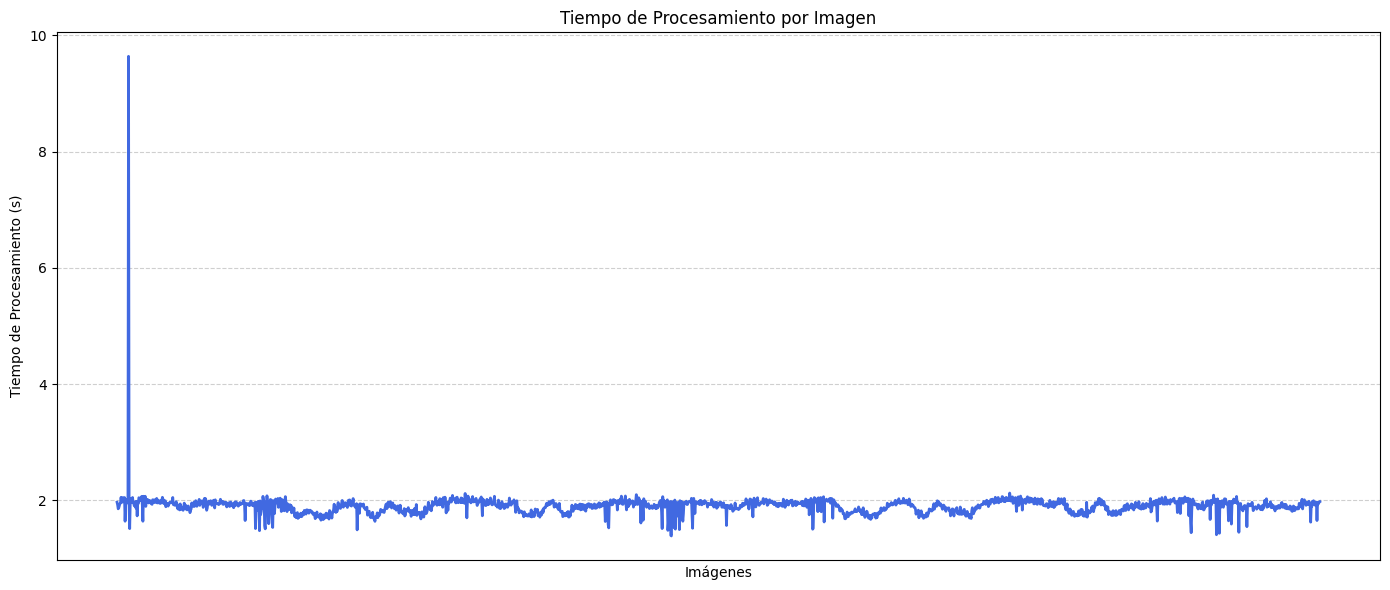

In [ ]:
import matplotlib.pyplot as plt

# 📌 Tiempo de procesamiento por imagen (sin ordenar, sin puntos en la línea)
plt.figure(figsize=(14, 6))
plt.plot(df["Tiempo de Procesamiento"], linestyle="-", color="royalblue", linewidth=2)

# Quitar etiquetas del eje X pero dejar espacio para mantener la estructura visual
plt.xticks([], [])

plt.xlabel("Imágenes")
plt.ylabel("Tiempo de Procesamiento (s)")
plt.title("Tiempo de Procesamiento por Imagen")

# Mejorar estética del gráfico
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


TypeError: 'Axes' object is not subscriptable

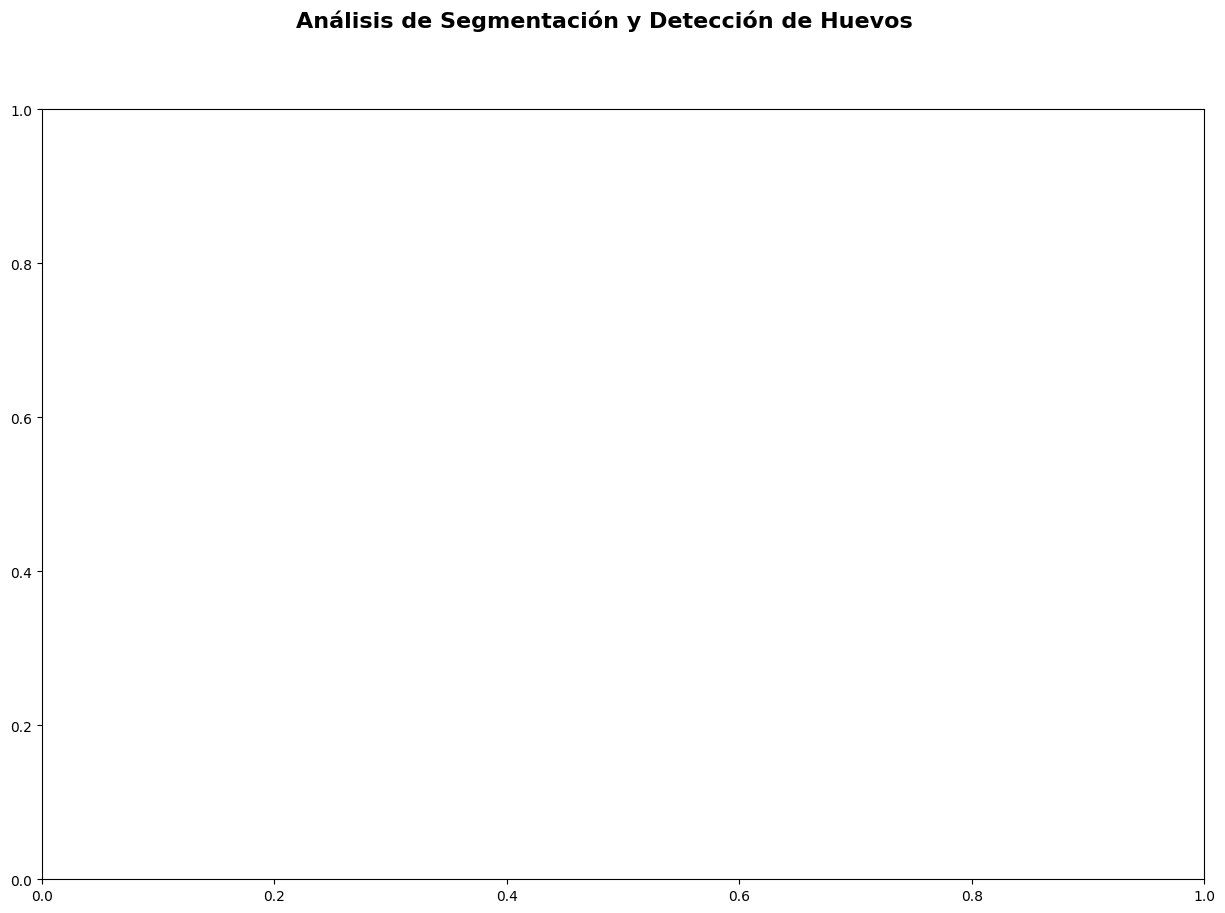

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Análisis de Segmentación y Detección de Huevos", fontsize=16, fontweight='bold')

# 📌 1. Gráfico acumulativo de huevos segmentados
axes[0, 0].plot(df.index, df["Huevos Segmentados"].cumsum(), marker="o", color="blue", markersize=2)
axes[0, 0].set_title("Gráfico Acumulativo de Huevos Segmentados")
axes[0, 0].set_xlabel("Imágenes")
axes[0, 0].set_ylabel("Total Acumulado de Huevos Segmentados")
axes[0, 0].grid()

# 📌 2. Tamaño promedio de los huevos por imagen
axes[0, 1].plot(df.index, df["Ancho Promedio"], label="Ancho Promedio", color="green")
axes[0, 1].plot(df.index, df["Alto Promedio"], label="Alto Promedio", color="orange")
axes[0, 1].set_title("Tamaño Promedio de los Huevos por Imagen")
axes[0, 1].set_xlabel("Imágenes")
axes[0, 1].set_ylabel("Tamaño (pixeles)")
axes[0, 1].legend()
axes[0, 1].grid()

# 📌 3. Gráfico de barras de huevos detectados vs. segmentados
axes[1, 0].bar(df.index, df["Huevos Detectados"], alpha=0.6, label="Detectados", color="blue")
axes[1, 0].bar(df.index, df["Huevos Segmentados"], alpha=0.6, label="Segmentados", color="red")
axes[1, 0].set_title("Huevos Detectados vs. Segmentados")
axes[1, 0].set_xlabel("Imágenes")
axes[1, 0].set_ylabel("Cantidad de Huevos")
axes[1, 0].legend()
axes[1, 0].grid()

# 📌 4. Análisis de outliers en tiempos de procesamiento (Scatter Plot)
axes[1, 1].scatter(df.index, df["Tiempo de Procesamiento"], color="purple", alpha=0.6, s=10)
axes[1, 1].set_title("Análisis de Outliers en Tiempos de Procesamiento")
axes[1, 1].set_xlabel("Imágenes")
axes[1, 1].set_ylabel("Tiempo de Procesamiento (s)")
axes[1, 1].grid()

# Ajustar diseño y mostrar
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Mostrar la imagen
plt.show()


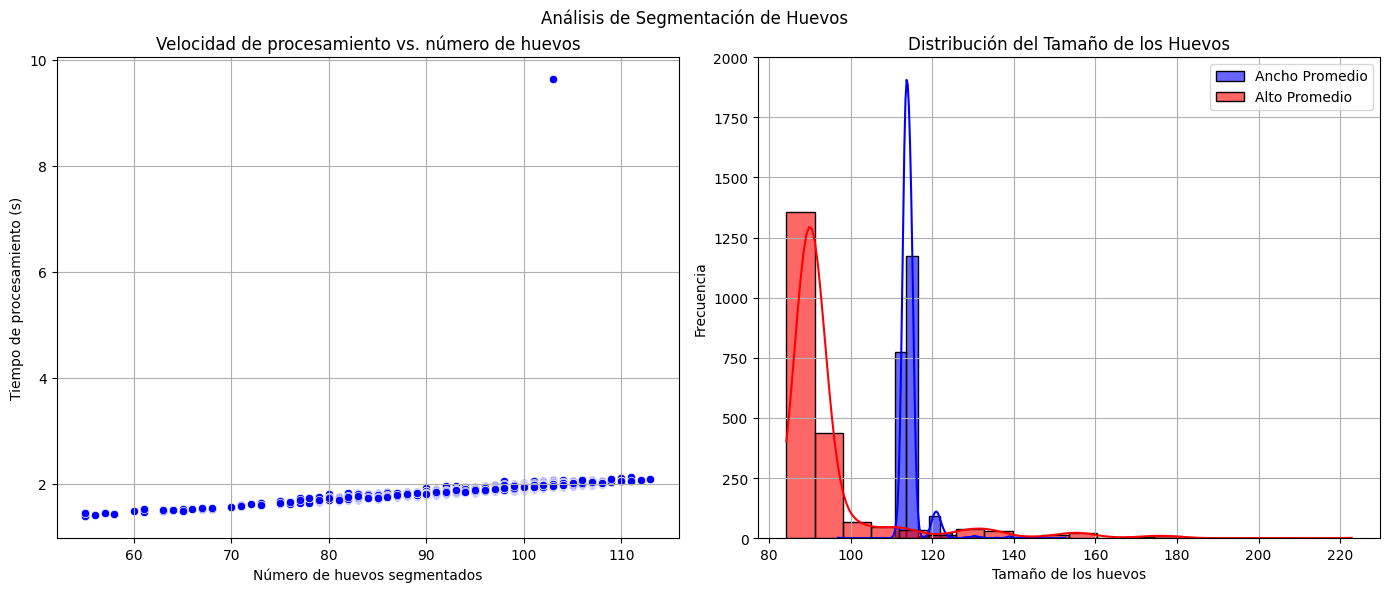

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Crear la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Análisis de Segmentación de Huevos")

# 📌 1. Velocidad de procesamiento vs. número de huevos (Scatter plot)
sns.scatterplot(x=df["Huevos Segmentados"], y=df["Tiempo de Procesamiento"], ax=axes[0], color="blue")
axes[0].set_xlabel("Número de huevos segmentados")
axes[0].set_ylabel("Tiempo de procesamiento (s)")
axes[0].set_title("Velocidad de procesamiento vs. número de huevos")
axes[0].grid()

# 📌 2. Distribución del tamaño de los huevos (Histograma con KDE)
sns.histplot(df["Ancho Promedio"], bins=20, kde=True, label="Ancho Promedio", color="blue", alpha=0.6, ax=axes[1])
sns.histplot(df["Alto Promedio"], bins=20, kde=True, label="Alto Promedio", color="red", alpha=0.6, ax=axes[1])
axes[1].set_xlabel("Tamaño de los huevos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Distribución del Tamaño de los Huevos")
axes[1].legend()
axes[1].grid()

# 📌 Ajustar diseño y mostrar la imagen
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [ ]:
# Install
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import os
from roboflow import Roboflow

# Autenticación con Roboflow
rf = Roboflow(api_key="TLhk9VaOvHQQkcd9xD9Y")
workspace = rf.workspace("utmach-gqdfl")
project = workspace.project("eggs-tfm-unir")

# Ruta de imágenes y etiquetas
images_dir = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset_eggs_yolo/images/"
labels_dir = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset_eggs_yolo/labels/"

# 🔹 Subir imágenes con anotaciones si existen
for img_name in os.listdir(images_dir):
    img_path = os.path.join(images_dir, img_name)
    label_path = os.path.join(labels_dir, img_name.replace(".jpg", ".txt"))  # Ajusta la extensión si es PNG

    try:
        if os.path.exists(label_path):  # Verifica si la etiqueta existe
            project.upload(image_path=img_path, annotation_path=label_path)
            print(f"✅ Subida {img_name} con anotaciones")
        else:
            project.upload(image_path=img_path)
            print(f"⚠️ Subida {img_name} sin anotaciones (No se encontró etiqueta)")
    except Exception as e:
        print(f"❌ Error al subir {img_name}: {str(e)}")

print("🎉 Proceso de subida finalizado.")

loading Roboflow workspace...
loading Roboflow project...
❌ Error al subir eggs_0198.jpg: Image was already annotated.
❌ Error al subir eggs_0200.jpg: Image was already annotated.
❌ Error al subir eggs_0201.jpg: Image was already annotated.
❌ Error al subir eggs_0202.jpg: Image was already annotated.
❌ Error al subir eggs_0203.jpg: Image was already annotated.
❌ Error al subir eggs_0204.jpg: Image was already annotated.
❌ Error al subir eggs_0205.jpg: Image was already annotated.
❌ Error al subir eggs_0206.jpg: Image was already annotated.
❌ Error al subir eggs_0207.jpg: Image was already annotated.
❌ Error al subir eggs_0209.jpg: Image was already annotated.
❌ Error al subir eggs_0208.jpg: Image was already annotated.
❌ Error al subir eggs_0211.jpg: Image was already annotated.
❌ Error al subir eggs_0210.jpg: Image was already annotated.
❌ Error al subir eggs_0212.jpg: Image was already annotated.
❌ Error al subir eggs_0213.jpg: Image was already annotated.
❌ Error al subir eggs_0214.

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
from ultralytics import YOLO

# Verificar la instalación y mostrar la versión
YOLO().info()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 166MB/s]


YOLO11n summary: 319 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(319, 2624080, 0, 6.614336)

In [ ]:
!pip install torchviz graphviz

In [ ]:
# Cargar el modelo YOLO11 preentrenado
model = YOLO("yolo11n.pt")  # Puedes elegir entre yolo11n.pt, yolo11s.pt, yolo11m.pt, yolo11l.pt, yolo11x.pt

In [26]:
from ultralytics import YOLO
import pandas as pd

# 📌 Obtener detalles de la arquitectura del modelo
model_info = {
    "Parámetro": [
        "Número de capas",
        "Parámetros entrenables",
        "Parámetros totales",
        "Flops (GFLOPs)",
        "Dimensión de entrada",
        "Número de clases",
        "Backbone",
        "Activación final"
    ],
    "Valor": [
        len(list(model.model.modules())),  # Contar capas en la arquitectura
        sum(p.numel() for p in model.model.parameters() if p.requires_grad),
        sum(p.numel() for p in model.model.parameters()),
        "No disponible",  # Flops no accesibles en YOLO11
        model.overrides.get("imgsz", "Desconocido"),  # Obtener imgsz
        len(model.names) if hasattr(model, "names") else "Desconocido",
        model.model[0].__class__.__name__ if hasattr(model.model, "__getitem__") else "Desconocido",
        model.model[-1].__class__.__name__ if hasattr(model.model, "__getitem__") else "Desconocido",
    ]
}

# 📌 Convertir a DataFrame con formato fila
df_config = pd.DataFrame(model_info)

# 📌 Mostrar la tabla en formato de texto plano
print(df_config.to_string(index=False))

# 📌 Guardar la tabla en un archivo de texto para copiar y pegar
file_path = "/content/YOLO11_configuracion.txt"
df_config.to_csv(file_path, sep="\t", index=False)

print(f"\n📄 La tabla ha sido guardada en: {file_path}")


             Parámetro         Valor
       Número de capas           238
Parámetros entrenables             0
    Parámetros totales       2582347
        Flops (GFLOPs) No disponible
  Dimensión de entrada           640
      Número de clases             1
              Backbone   Desconocido
      Activación final   Desconocido

📄 La tabla ha sido guardada en: /content/YOLO11_configuracion.txt


In [ ]:
# Entrenar el modelo con tus datos
model.train(data="/content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/data.yaml", epochs=100, imgsz=640, device="cuda")

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

100%|██████████| 755k/755k [00:00<00:00, 154MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/labels... 4149 images, 6 backgrounds, 106 corrupt: 100%|██████████| 4149/4149 [09:56<00:00,  6.95it/s]

train: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0005_jpg.rf.2916783e323f8325ada81c241a4d0060.jpg: 6 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0005_jpg.rf.2973c4c06ca1dc498a29ba2fb27fda8a.jpg: 6 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0005_jpg.rf.d9d4e63342947112ab2d769cc3c8265a.jpg: 6 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0006_jpg.rf.beae8babbb8d79b92bf008f5e61b01c8.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/images/eggs_0006_jpg.rf.e3de27e235f8f0fc5e277e13e0f07872.jpg: 2 duplicate labels removed
train: WARNING 

train: New cache created: /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/labels... 417 images, 0 backgrounds, 19 corrupt: 100%|██████████| 417/417 [00:52<00:00,  7.94it/s]

val: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0202_jpg.rf.beaf178236a8145cc3753f2a8bf87f02.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0213_jpg.rf.14ad87cc183ffb6531dd31b3fea01569.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0227_jpg.rf.fd5b77dc4b8c75bc1566ca966c1e92fc.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0228_jpg.rf.d38b7f622ee4965db323dfc92675f1df.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/images/eggs_0235_jpg.rf.9602108834ed11a3124093317512cced.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/

val: New cache created: /content/drive/MyDrive/MaestriaIA/Tesis/eggs-TFM-UNIR.v2-eggs_database_1.yolov8-obb/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.17G     0.4386      1.007      0.848        586        640: 100%|██████████| 253/253 [02:34<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]

                   all        398      14887      0.963      0.993      0.978      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.64G     0.3464     0.3908     0.8148        654        640: 100%|██████████| 253/253 [02:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.40it/s]

                   all        398      14887      0.975       0.99      0.989      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.41G     0.3454     0.3562     0.8138        733        640: 100%|██████████| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]

                   all        398      14887      0.972      0.985      0.989      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.08G     0.3311     0.3288     0.8113        707        640: 100%|██████████| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]


                   all        398      14887      0.977      0.986      0.989      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.54G     0.3217     0.3058     0.8095        458        640: 100%|██████████| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]

                   all        398      14887      0.974      0.991       0.99       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.22G     0.3127     0.2934      0.809        701        640: 100%|██████████| 253/253 [02:30<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]

                   all        398      14887      0.975       0.99      0.991      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.53G     0.3069     0.2838     0.8076        443        640: 100%|██████████| 253/253 [02:28<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]

                   all        398      14887      0.969      0.992      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.85G     0.2965     0.2737     0.8064        760        640: 100%|██████████| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]

                   all        398      14887      0.974      0.991      0.991      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       4.7G     0.2946     0.2679     0.8053        678        640: 100%|██████████| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]

                   all        398      14887      0.976       0.99      0.991      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.37G     0.2873      0.259     0.8052        772        640: 100%|██████████| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.48it/s]

                   all        398      14887      0.971      0.993      0.991      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.64G     0.2788     0.2517     0.8041        660        640: 100%|██████████| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]

                   all        398      14887      0.973      0.988      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.03G     0.2795     0.2491      0.804        594        640: 100%|██████████| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]

                   all        398      14887       0.97      0.992      0.991      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.64G     0.2749     0.2478     0.8027        687        640: 100%|██████████| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        398      14887      0.976      0.989      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.28G     0.2706     0.2435     0.8032        615        640: 100%|██████████| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]

                   all        398      14887      0.977      0.986      0.991      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.85G     0.2748     0.2435      0.803        729        640: 100%|██████████| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]

                   all        398      14887      0.976       0.99      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.56G      0.273      0.241     0.8028        634        640: 100%|██████████| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        398      14887      0.972      0.992      0.991      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.73G     0.2677     0.2399     0.8022        587        640: 100%|██████████| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]

                   all        398      14887      0.977       0.99      0.992      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.45G     0.2676     0.2351     0.8026        484        640: 100%|██████████| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]

                   all        398      14887      0.978      0.989      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.94G     0.2646     0.2318     0.8007        731        640: 100%|██████████| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]

                   all        398      14887      0.976      0.991      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.37G     0.2667     0.2325     0.8018        595        640: 100%|██████████| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]

                   all        398      14887      0.978      0.989      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.82G     0.2637      0.229     0.8009        668        640: 100%|██████████| 253/253 [02:27<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]

                   all        398      14887      0.977       0.99      0.993      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.48G     0.2605     0.2283     0.8004        771        640: 100%|██████████| 253/253 [02:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]

                   all        398      14887      0.974      0.992      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.57G     0.2583     0.2307     0.8004        662        640: 100%|██████████| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

                   all        398      14887      0.976      0.991      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.63G      0.258     0.2282     0.8011        687        640: 100%|██████████| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]

                   all        398      14887      0.975       0.99      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.17G     0.2556     0.2197     0.8004        550        640: 100%|██████████| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.53it/s]

                   all        398      14887      0.974      0.992      0.992      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.15G     0.2568     0.2201     0.8005        470        640: 100%|██████████| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]

                   all        398      14887      0.977      0.989      0.992      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.59G     0.2529      0.222     0.8006        713        640: 100%|██████████| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.75it/s]

                   all        398      14887      0.976       0.99      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.66G      0.256     0.2219      0.801        770        640: 100%|██████████| 253/253 [02:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]


                   all        398      14887      0.976      0.991      0.992      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.49G     0.2544     0.2225     0.7993        570        640: 100%|██████████| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.56it/s]

                   all        398      14887      0.977      0.991      0.991      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.21G     0.2517     0.2192      0.799        475        640: 100%|██████████| 253/253 [02:28<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        398      14887      0.976      0.991      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.87G     0.2517     0.2163     0.7982        683        640: 100%|██████████| 253/253 [02:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.57it/s]

                   all        398      14887      0.976      0.988      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.27G     0.2503     0.2188     0.7991        620        640: 100%|██████████| 253/253 [02:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]

                   all        398      14887      0.975      0.992      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.32G     0.2508     0.2153     0.7985        568        640: 100%|██████████| 253/253 [02:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.66it/s]

                   all        398      14887      0.975      0.989      0.993      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.59G     0.2502     0.2159     0.7985        666        640: 100%|██████████| 253/253 [02:31<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        398      14887      0.976       0.99      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.47G     0.2488     0.2166     0.7973        733        640: 100%|██████████| 253/253 [02:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.42it/s]

                   all        398      14887      0.972      0.993      0.992      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.73G     0.2453     0.2107     0.7972        555        640: 100%|██████████| 253/253 [02:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:01<00:06,  1.69it/s]Exception in thread Thread-38 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickle

KeyboardInterrupt: 

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# 📌 Directorio donde YOLO guarda los registros de entrenamiento
log_dir = "runs/detect/train"  # Asegúrate de que este directorio coincida con el de tu entrenamiento

# 📌 Cargar los datos de entrenamiento de YOLO
results_csv = os.path.join(log_dir, "results.csv")

# 📌 Verificar si el archivo existe
if not os.path.exists(results_csv):
    print(f"⚠️ El archivo {results_csv} no existe. Asegúrate de haber completado el entrenamiento.")
else:
    df = pd.read_csv(results_csv)

In [ ]:
print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


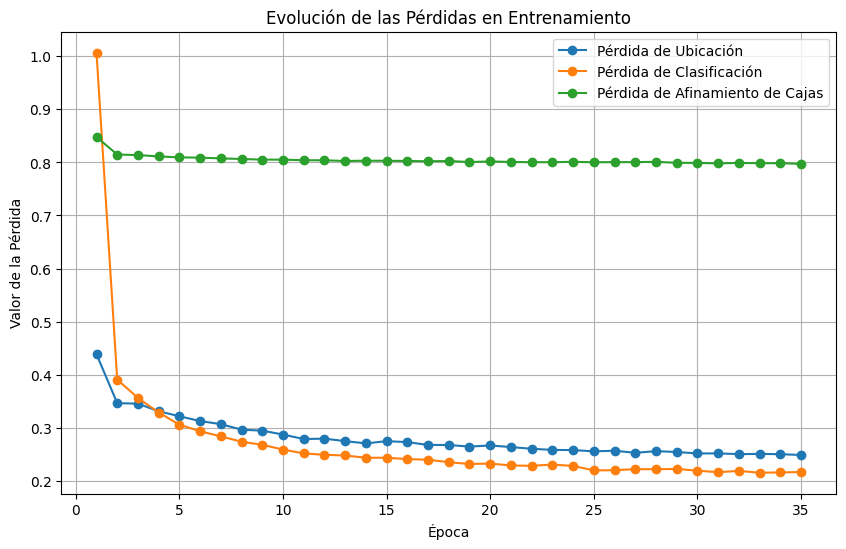

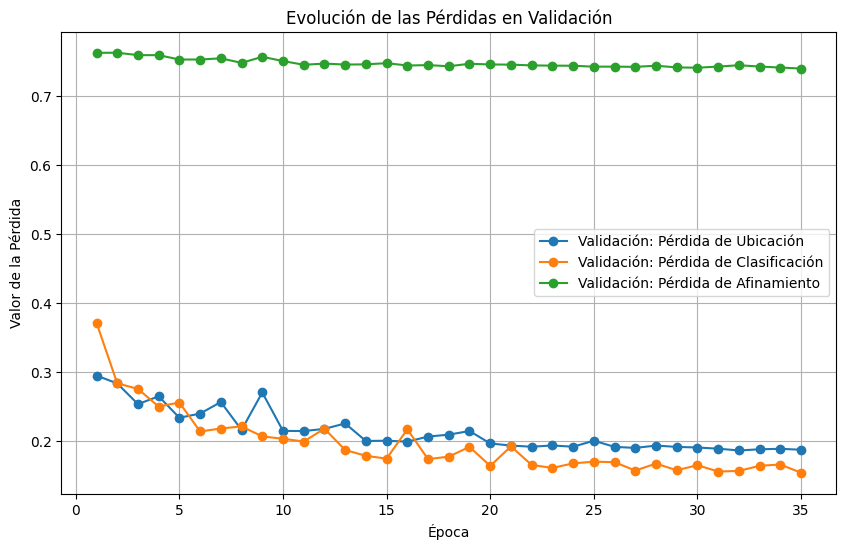

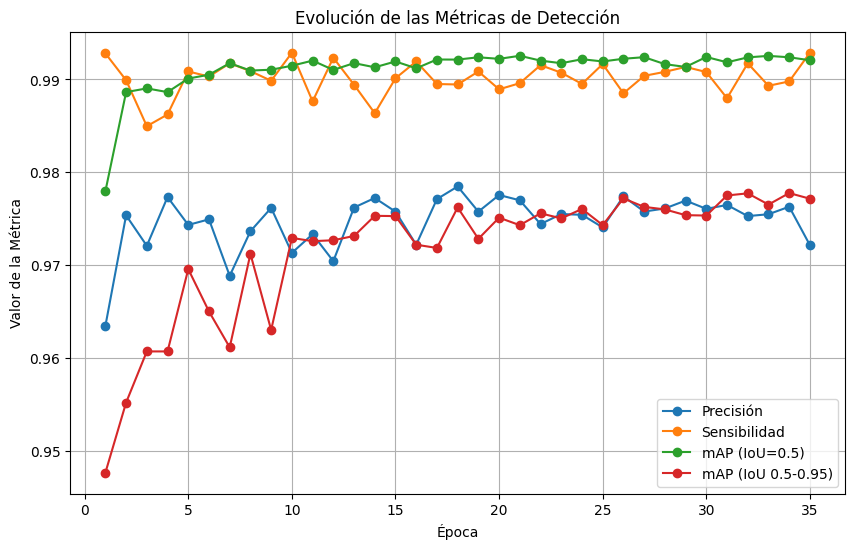

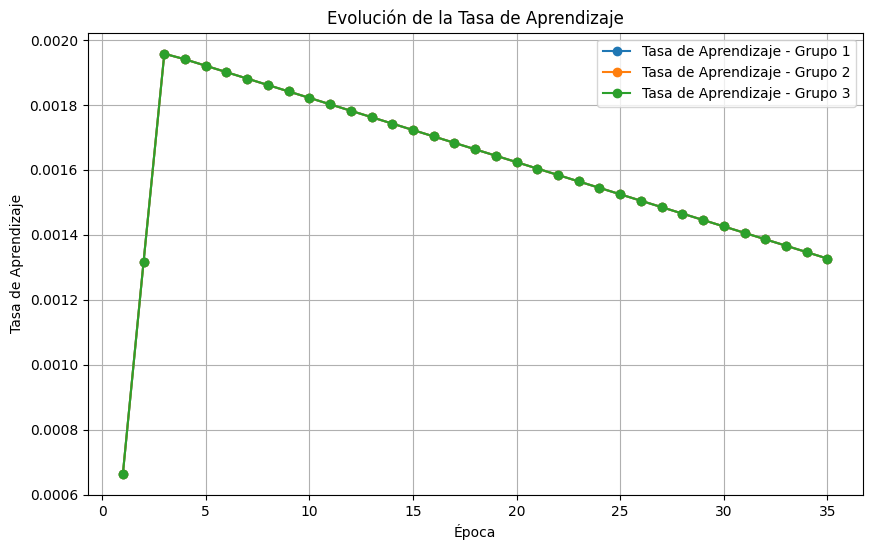

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar los datos desde un archivo CSV
# Asegúrate de que "log_training.csv" esté en la misma carpeta que tu script o ajusta la ruta.
df = pd.read_csv("/content/runs/detect/train/results.csv")

# 2. Renombrar las columnas para que sean más descriptivas
df = df.rename(columns={
    'train/box_loss': 'Pérdida de Ubicación',
    'train/cls_loss': 'Pérdida de Clasificación',
    'train/dfl_loss': 'Pérdida de Afinamiento de Cajas',
    'val/box_loss': 'Validación: Pérdida de Ubicación',
    'val/cls_loss': 'Validación: Pérdida de Clasificación',
    'val/dfl_loss': 'Validación: Pérdida de Afinamiento',
    'metrics/precision(B)': 'Precisión',
    'metrics/recall(B)': 'Sensibilidad',
    'metrics/mAP50(B)': 'mAP (IoU=0.5)',
    'metrics/mAP50-95(B)': 'mAP (IoU 0.5-0.95)',
    'lr/pg0': 'LR - Grupo 1',
    'lr/pg1': 'LR - Grupo 2',
    'lr/pg2': 'LR - Grupo 3'
})

# 3. Graficar la evolución de las pérdidas en el entrenamiento

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['Pérdida de Ubicación'], marker='o', label="Pérdida de Ubicación")
plt.plot(df['epoch'], df['Pérdida de Clasificación'], marker='o', label="Pérdida de Clasificación")
plt.plot(df['epoch'], df['Pérdida de Afinamiento de Cajas'], marker='o', label="Pérdida de Afinamiento de Cajas")
plt.xlabel("Época")
plt.ylabel("Valor de la Pérdida")
plt.title("Evolución de las Pérdidas en Entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

# 4. Graficar la evolución de las pérdidas en la validación

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['Validación: Pérdida de Ubicación'], marker='o', label="Validación: Pérdida de Ubicación")
plt.plot(df['epoch'], df['Validación: Pérdida de Clasificación'], marker='o', label="Validación: Pérdida de Clasificación")
plt.plot(df['epoch'], df['Validación: Pérdida de Afinamiento'], marker='o', label="Validación: Pérdida de Afinamiento")
plt.xlabel("Época")
plt.ylabel("Valor de la Pérdida")
plt.title("Evolución de las Pérdidas en Validación")
plt.legend()
plt.grid(True)
plt.show()

# 5. Graficar la evolución de las métricas de detección

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['Precisión'], marker='o', label="Precisión")
plt.plot(df['epoch'], df['Sensibilidad'], marker='o', label="Sensibilidad")
plt.plot(df['epoch'], df['mAP (IoU=0.5)'], marker='o', label="mAP (IoU=0.5)")
plt.plot(df['epoch'], df['mAP (IoU 0.5-0.95)'], marker='o', label="mAP (IoU 0.5-0.95)")
plt.xlabel("Época")
plt.ylabel("Valor de la Métrica")
plt.title("Evolución de las Métricas de Detección")
plt.legend()
plt.grid(True)
plt.show()

# 6. Graficar la evolución de la tasa de aprendizaje para cada grupo

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['LR - Grupo 1'], marker='o', label="Tasa de Aprendizaje - Grupo 1")
plt.plot(df['epoch'], df['LR - Grupo 2'], marker='o', label="Tasa de Aprendizaje - Grupo 2")
plt.plot(df['epoch'], df['LR - Grupo 3'], marker='o', label="Tasa de Aprendizaje - Grupo 3")
plt.xlabel("Época")
plt.ylabel("Tasa de Aprendizaje")
plt.title("Evolución de la Tasa de Aprendizaje")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Cargar el modelo entrenado
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [24]:
import os

# Ruta de la carpeta donde tienes las imágenes nuevas
image_folder = "/content/drive/MyDrive/MaestriaIA/Tesis/dataset_prueba"

# Obtener la lista de imágenes
image_files = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png', '.jpeg'))]

# Aplicar el modelo a cada imagen
results = model(image_files, save=True, conf=0.5)




0: 384x640 106 0s, 1.1ms
1: 384x640 106 0s, 1.1ms
2: 384x640 106 0s, 1.1ms
3: 384x640 106 0s, 1.1ms
4: 384x640 107 0s, 1.1ms
5: 384x640 106 0s, 1.1ms
6: 384x640 106 0s, 1.1ms
7: 384x640 106 0s, 1.1ms
8: 384x640 108 0s, 1.1ms
9: 384x640 106 0s, 1.1ms
10: 384x640 106 0s, 1.1ms
Speed: 2.3ms preprocess, 1.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4
